In [15]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from plot_days_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort2")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# ANIMALS
ANIMAL_IDS = [
    "R020",
    "R021",
    "R022",
    "R023",
    "R024",
    "R025",
    "R026",
    "R027",
    "R028",
    "R029",
]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [17]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2023-10-27 18:32:06,092][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 13 sessions for R020 between 2023-10-14 and 2023-10-26
fetched 14 sessions for R021 between 2023-10-14 and 2023-10-27
fetched 14 sessions for R022 between 2023-10-14 and 2023-10-27
fetched 14 sessions for R023 between 2023-10-14 and 2023-10-27
fetched 14 sessions for R024 between 2023-10-14 and 2023-10-27
fetched 14 sessions for R025 between 2023-10-14 and 2023-10-27
fetched 14 sessions for R026 between 2023-10-14 and 2023-10-27
fetched 14 sessions for R027 between 2023-10-14 and 2023-10-27
fetched 13 sessions for R028 between 2023-10-14 and 2023-10-27
fetched 14 sessions for R029 between 2023-10-14 and 2023-10-27


In [18]:
date_min

'2023-10-07'

In [19]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R02s_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min="2023-10-07",
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(DATA_PATH / f_name)

partial dj load with new date min 2023-10-07 -> 2023-10-27
Returning appended df with entries between 2023-10-07 and 2023-10-27
Saved out appended df to C:\Users\JB\github\jbreda_animal_training\data\days_dfs\R02s_days_df.csv


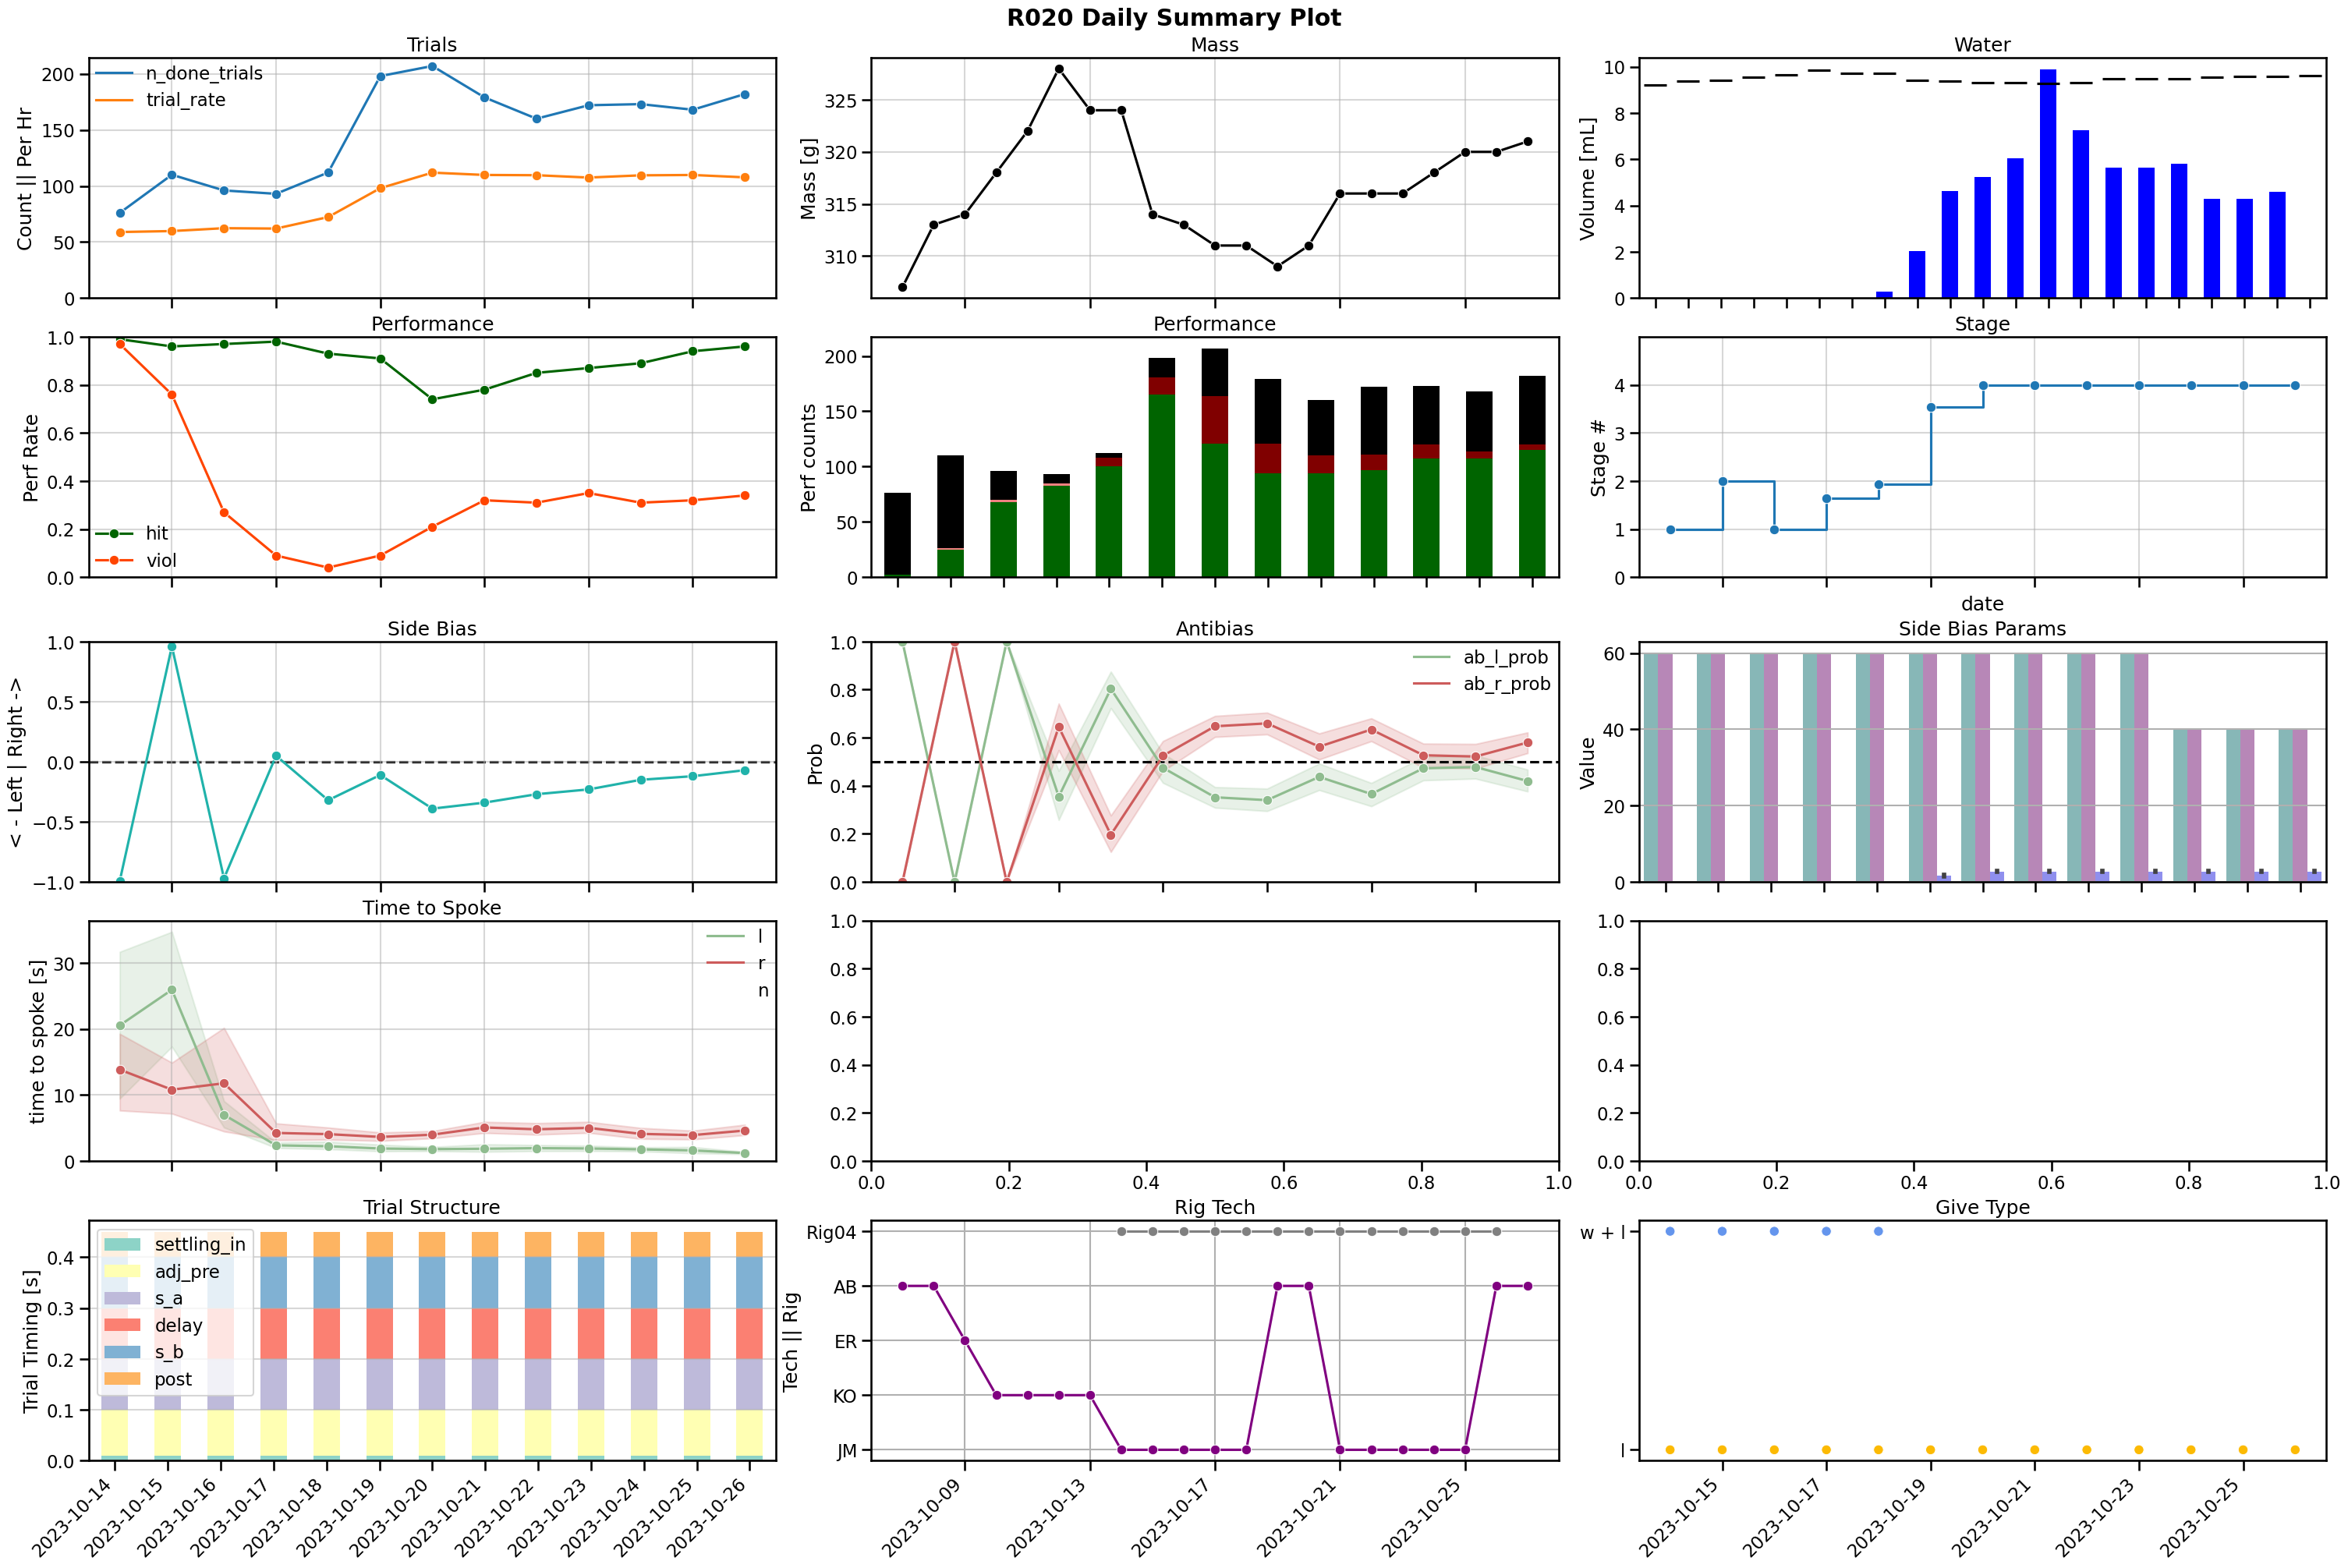

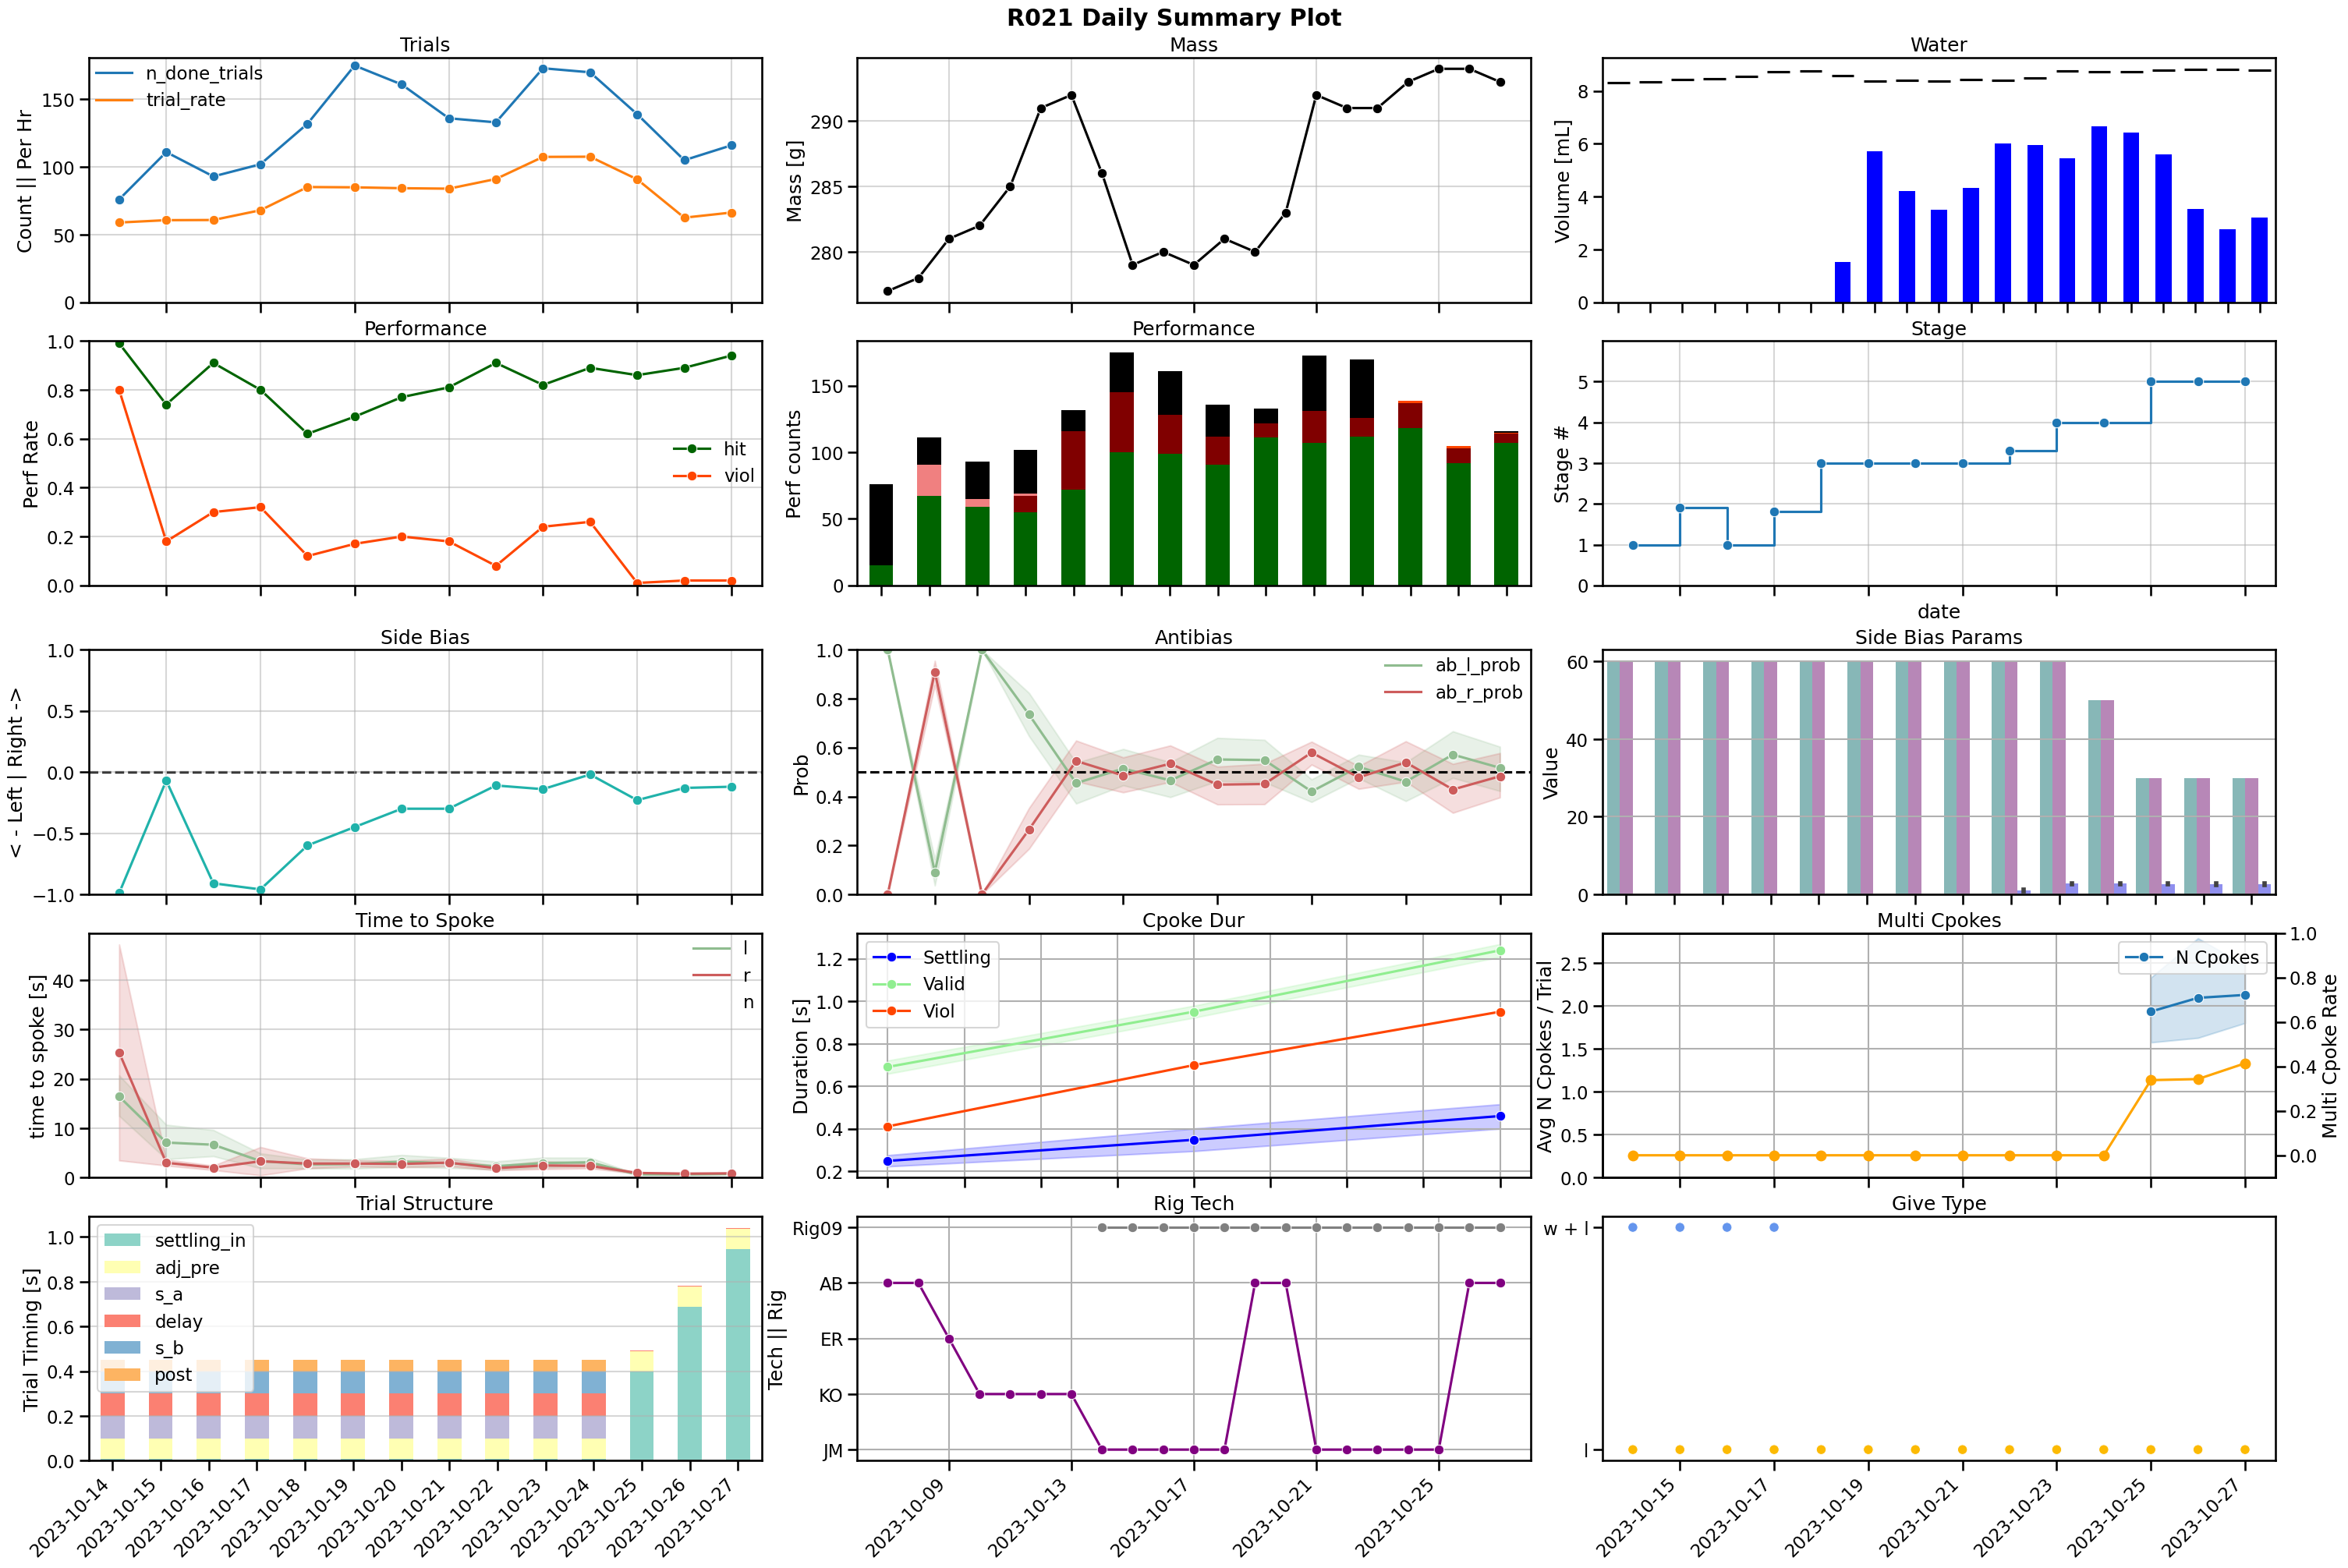

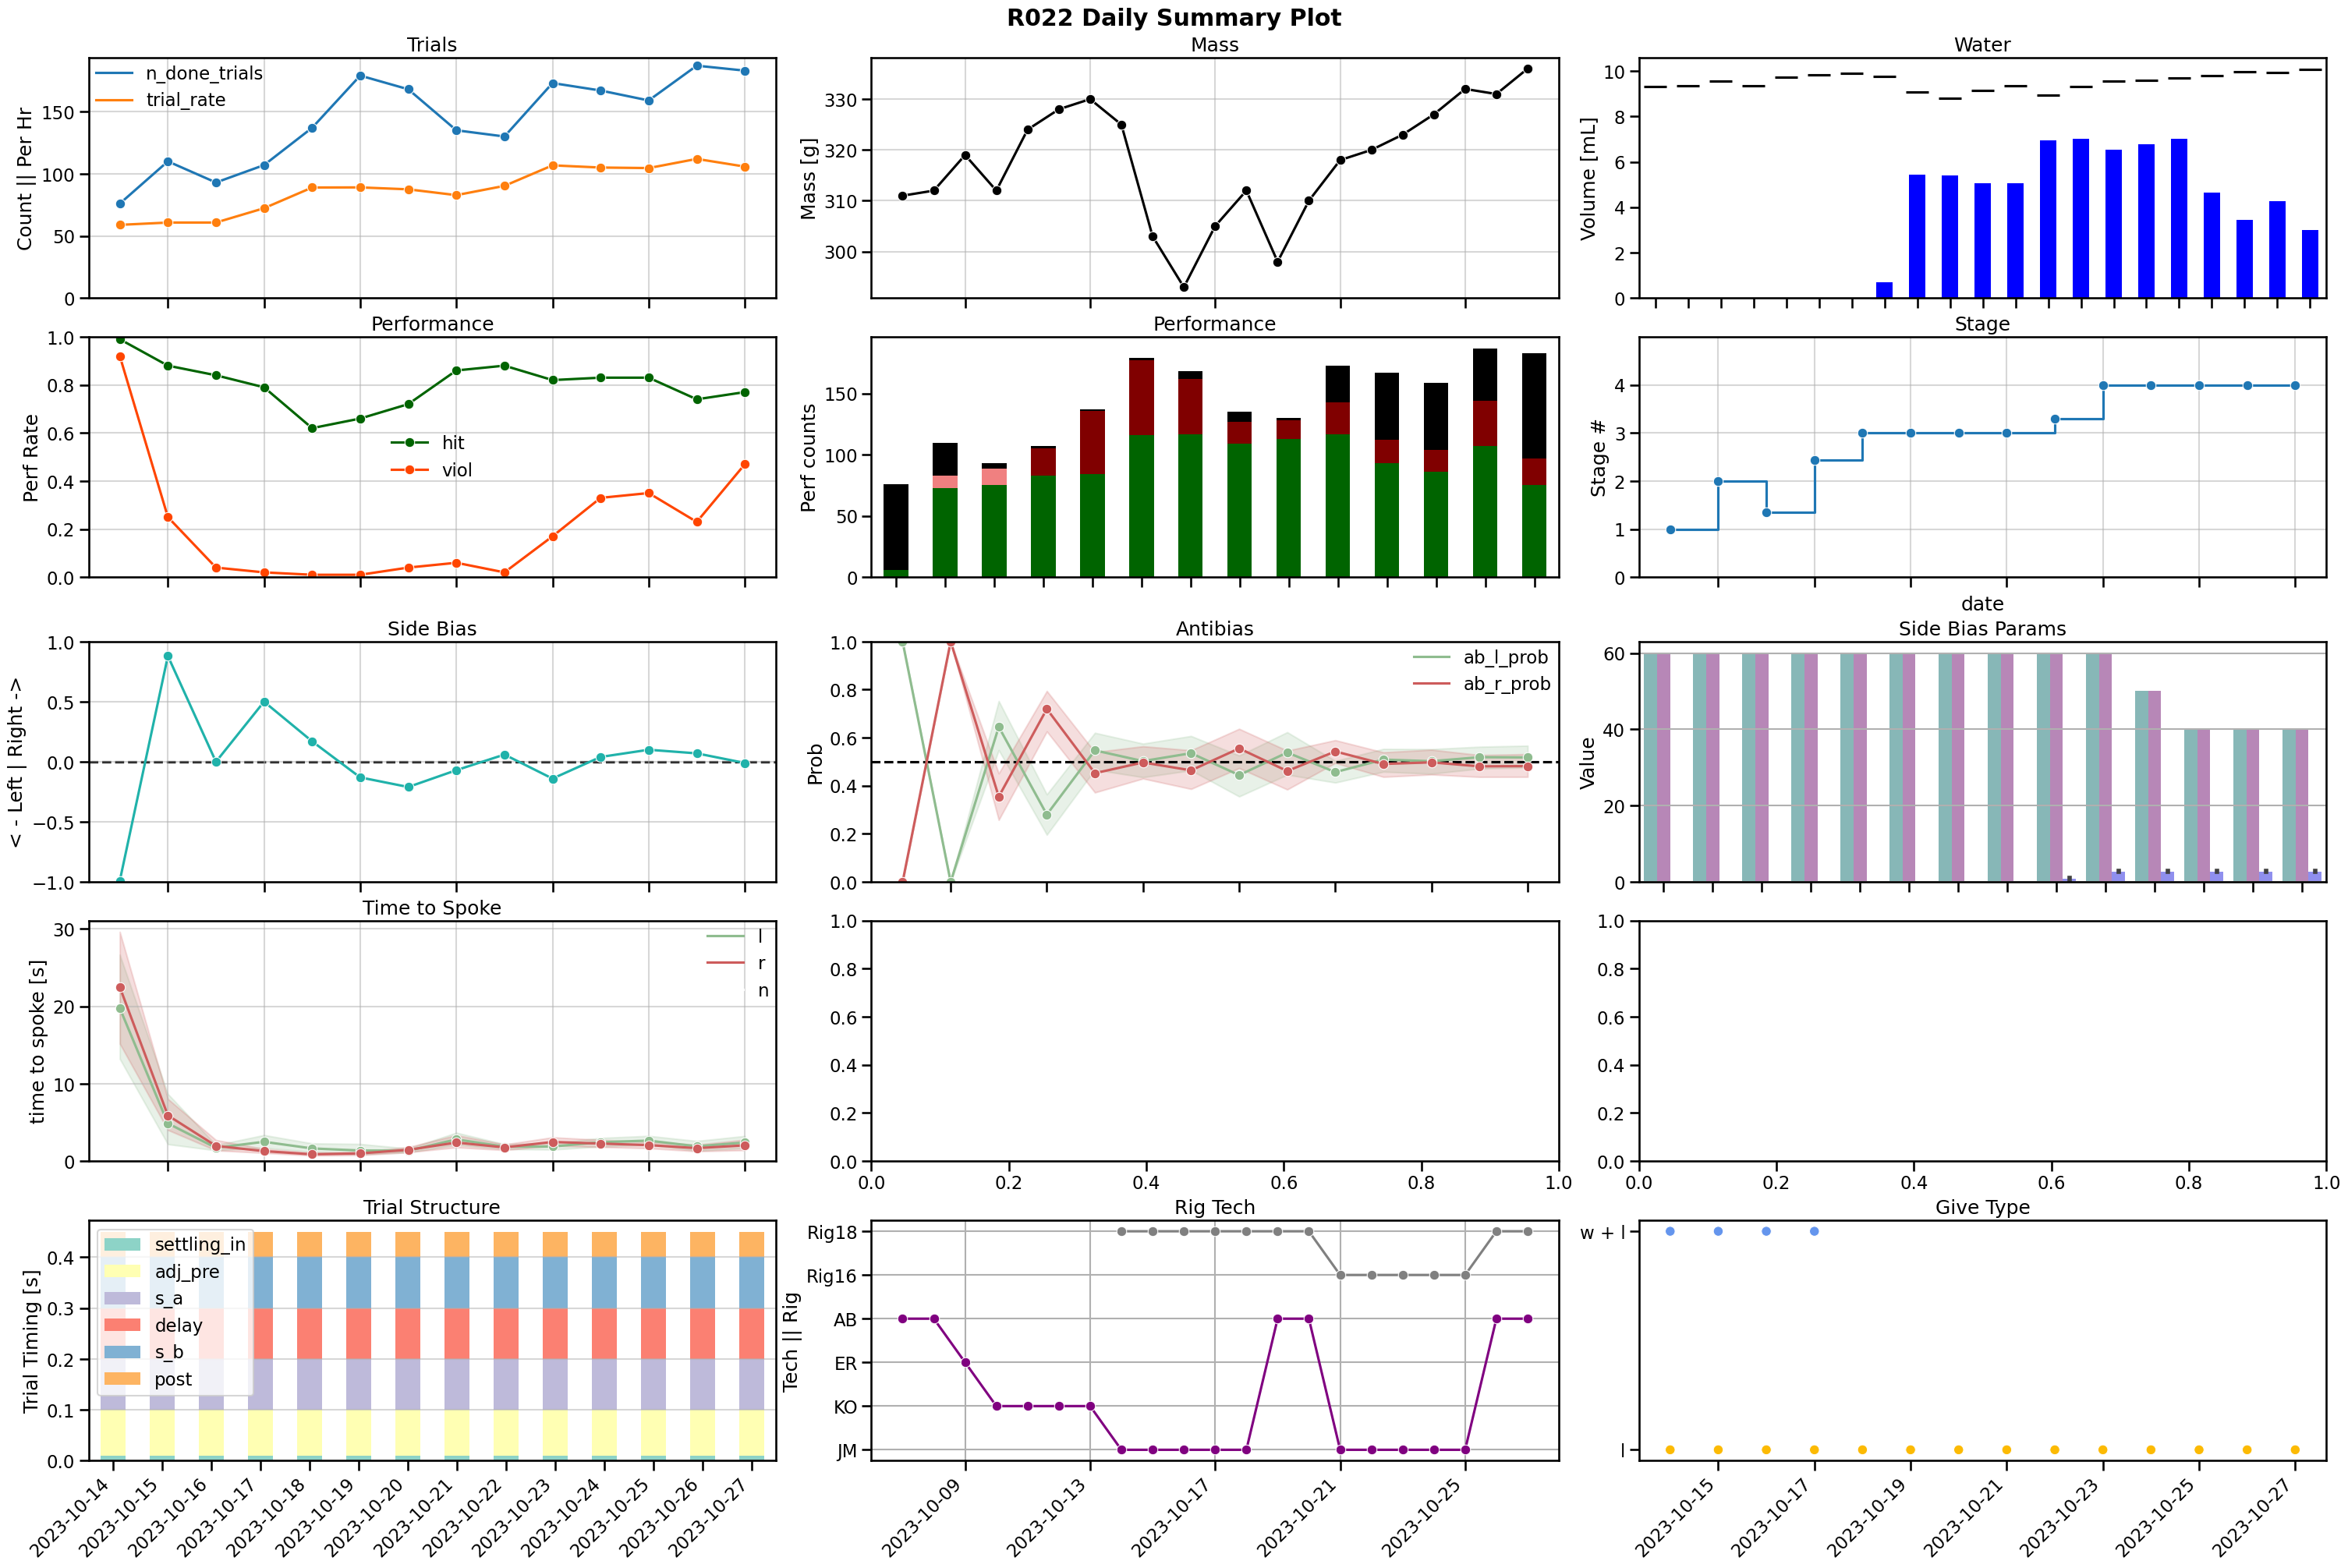

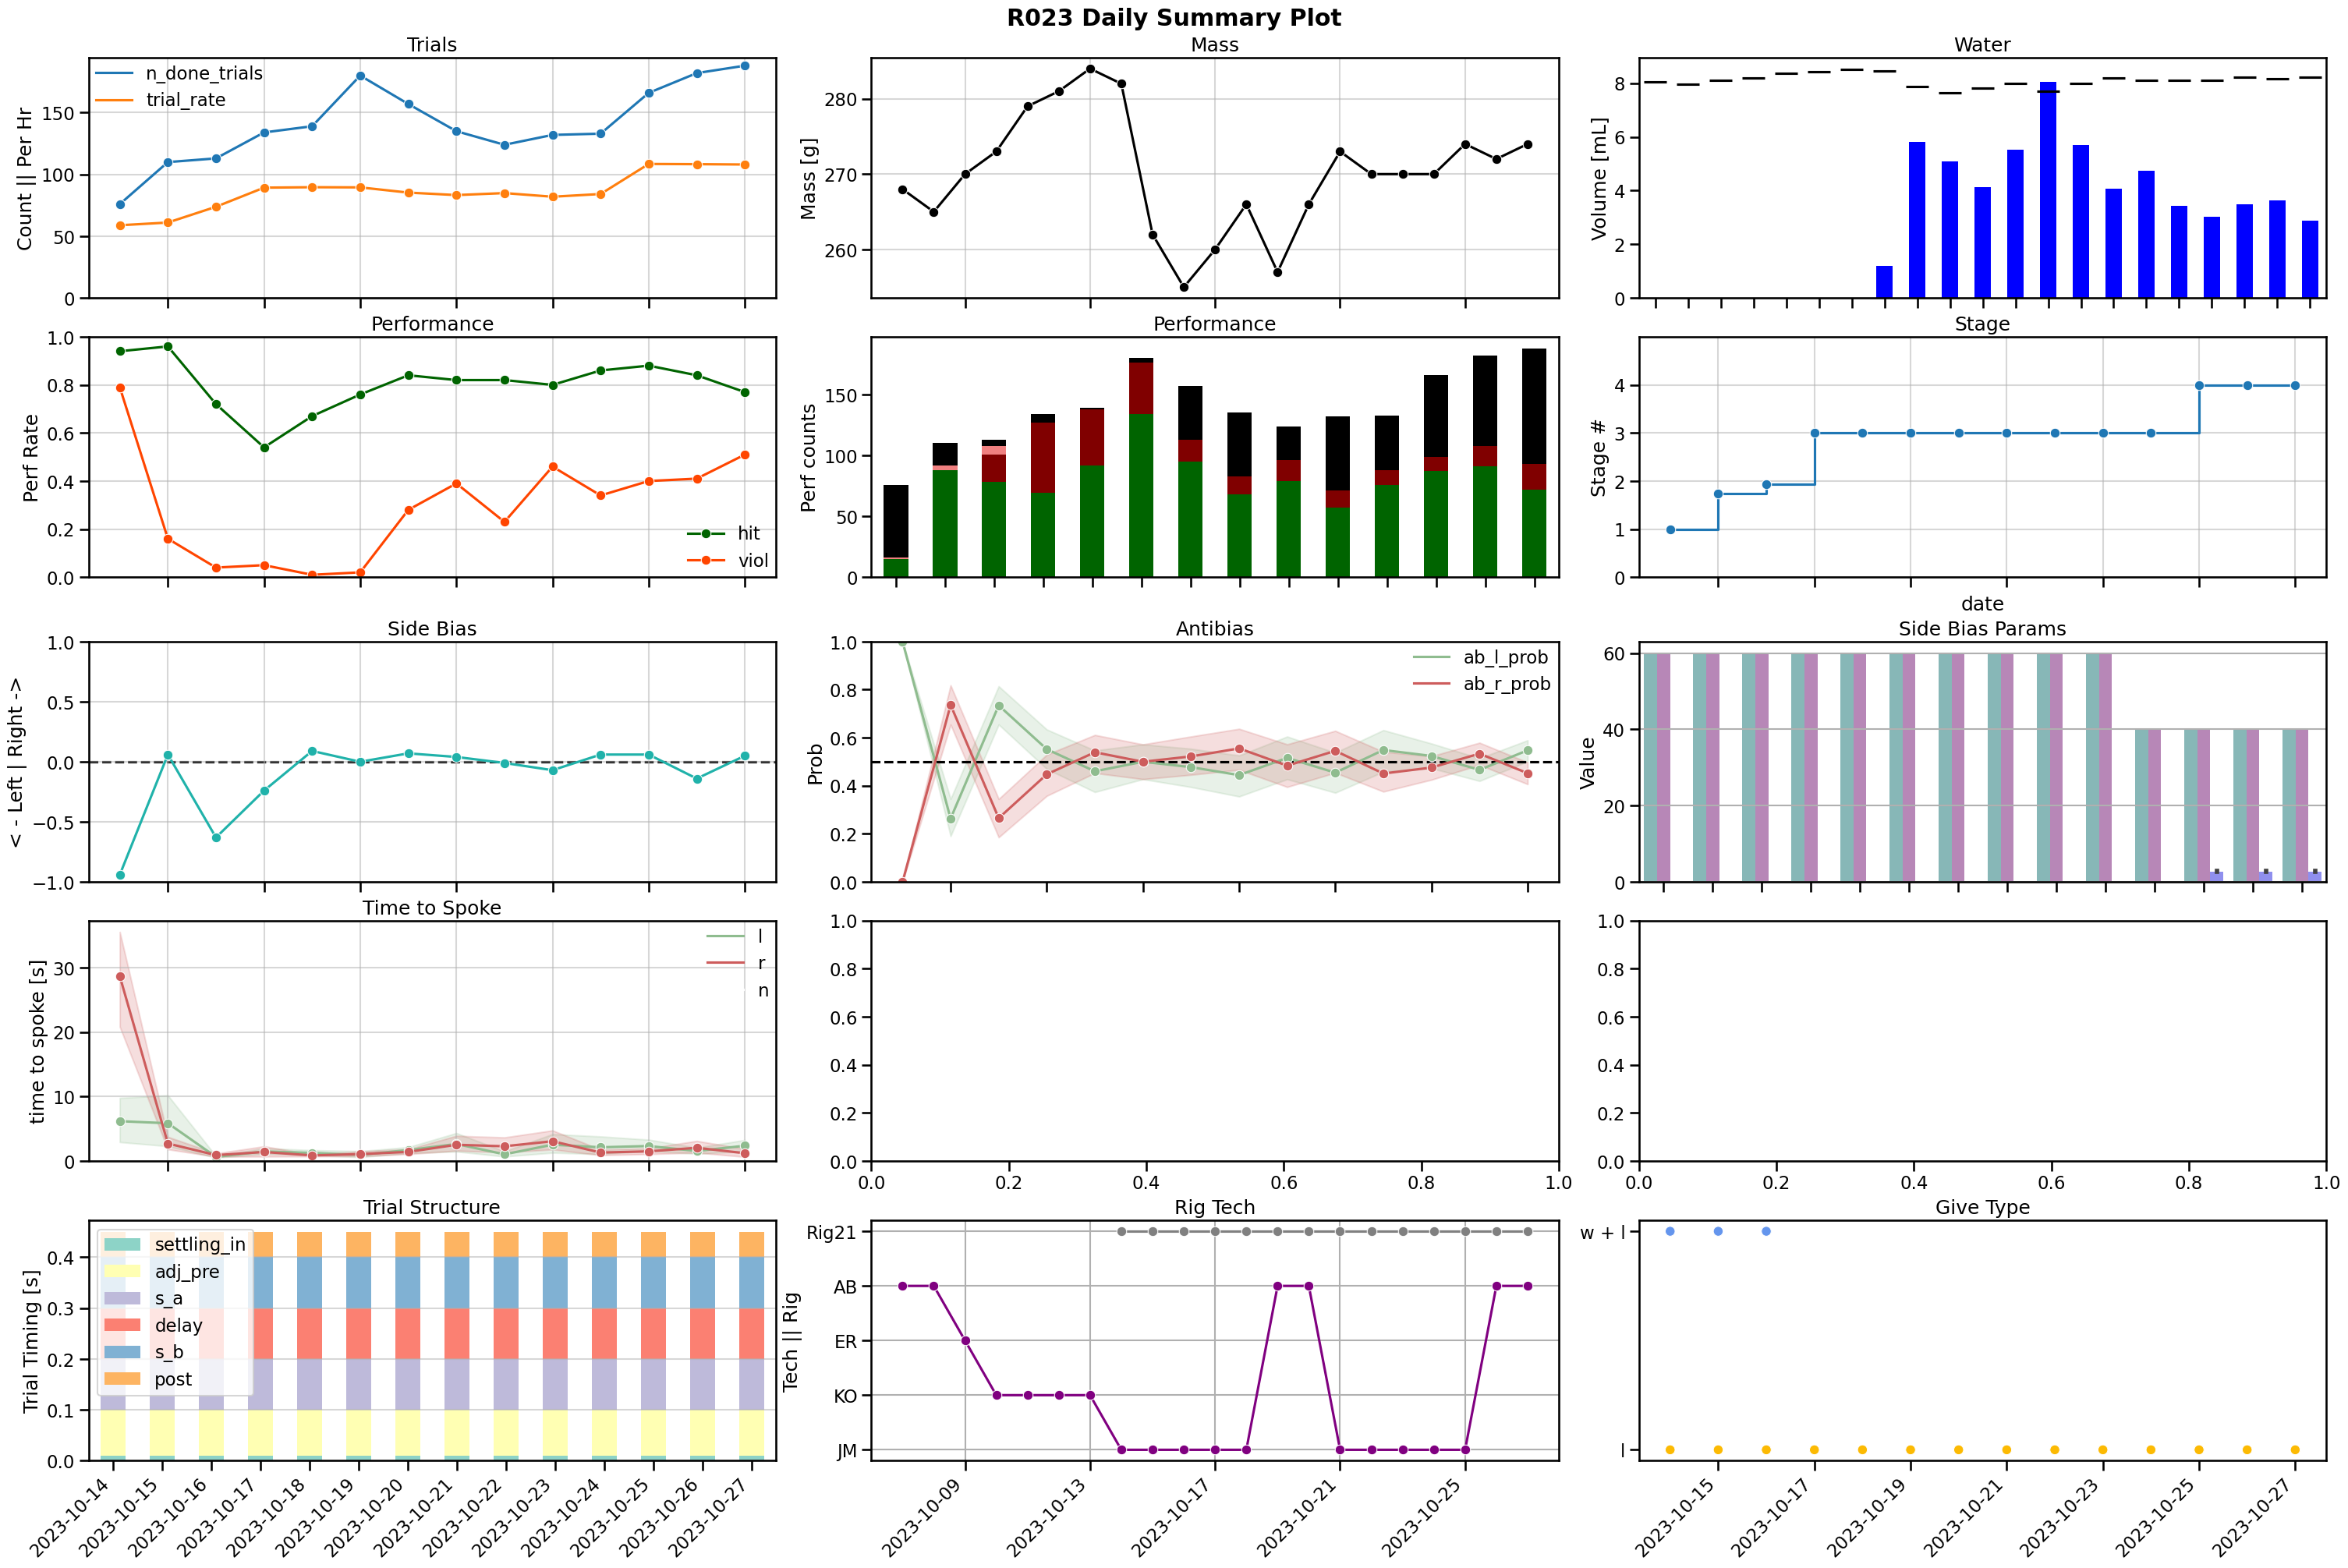

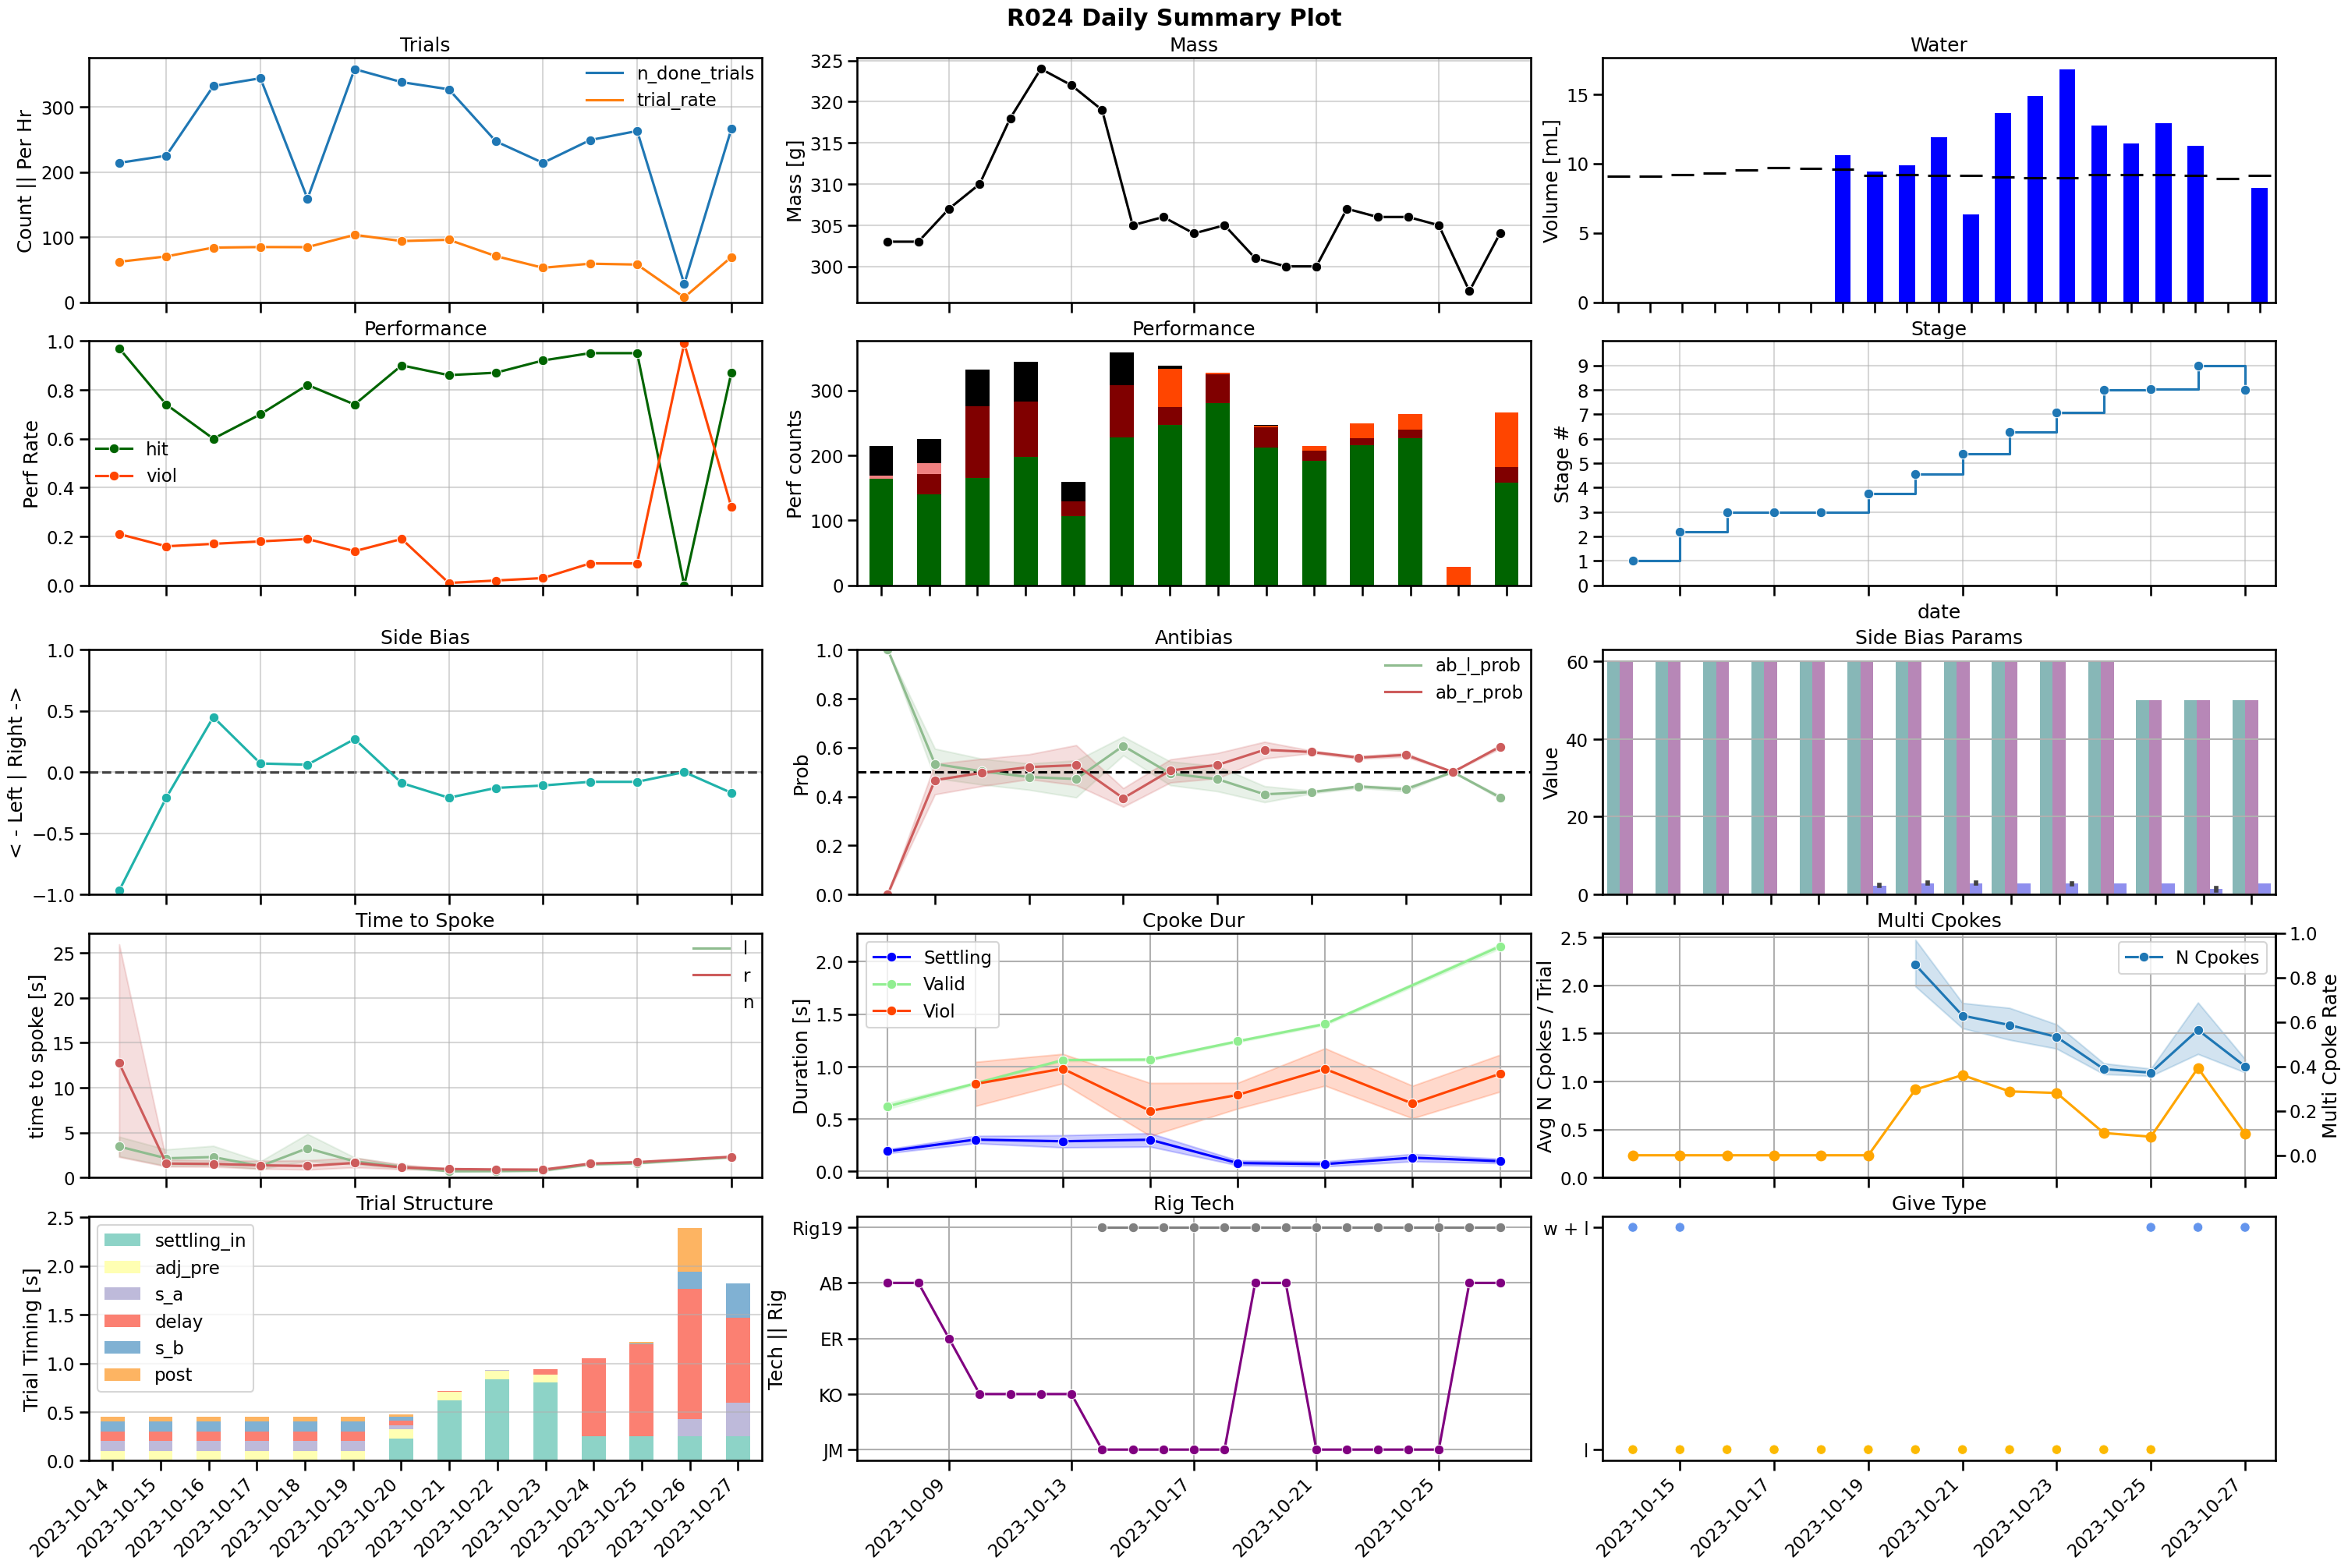

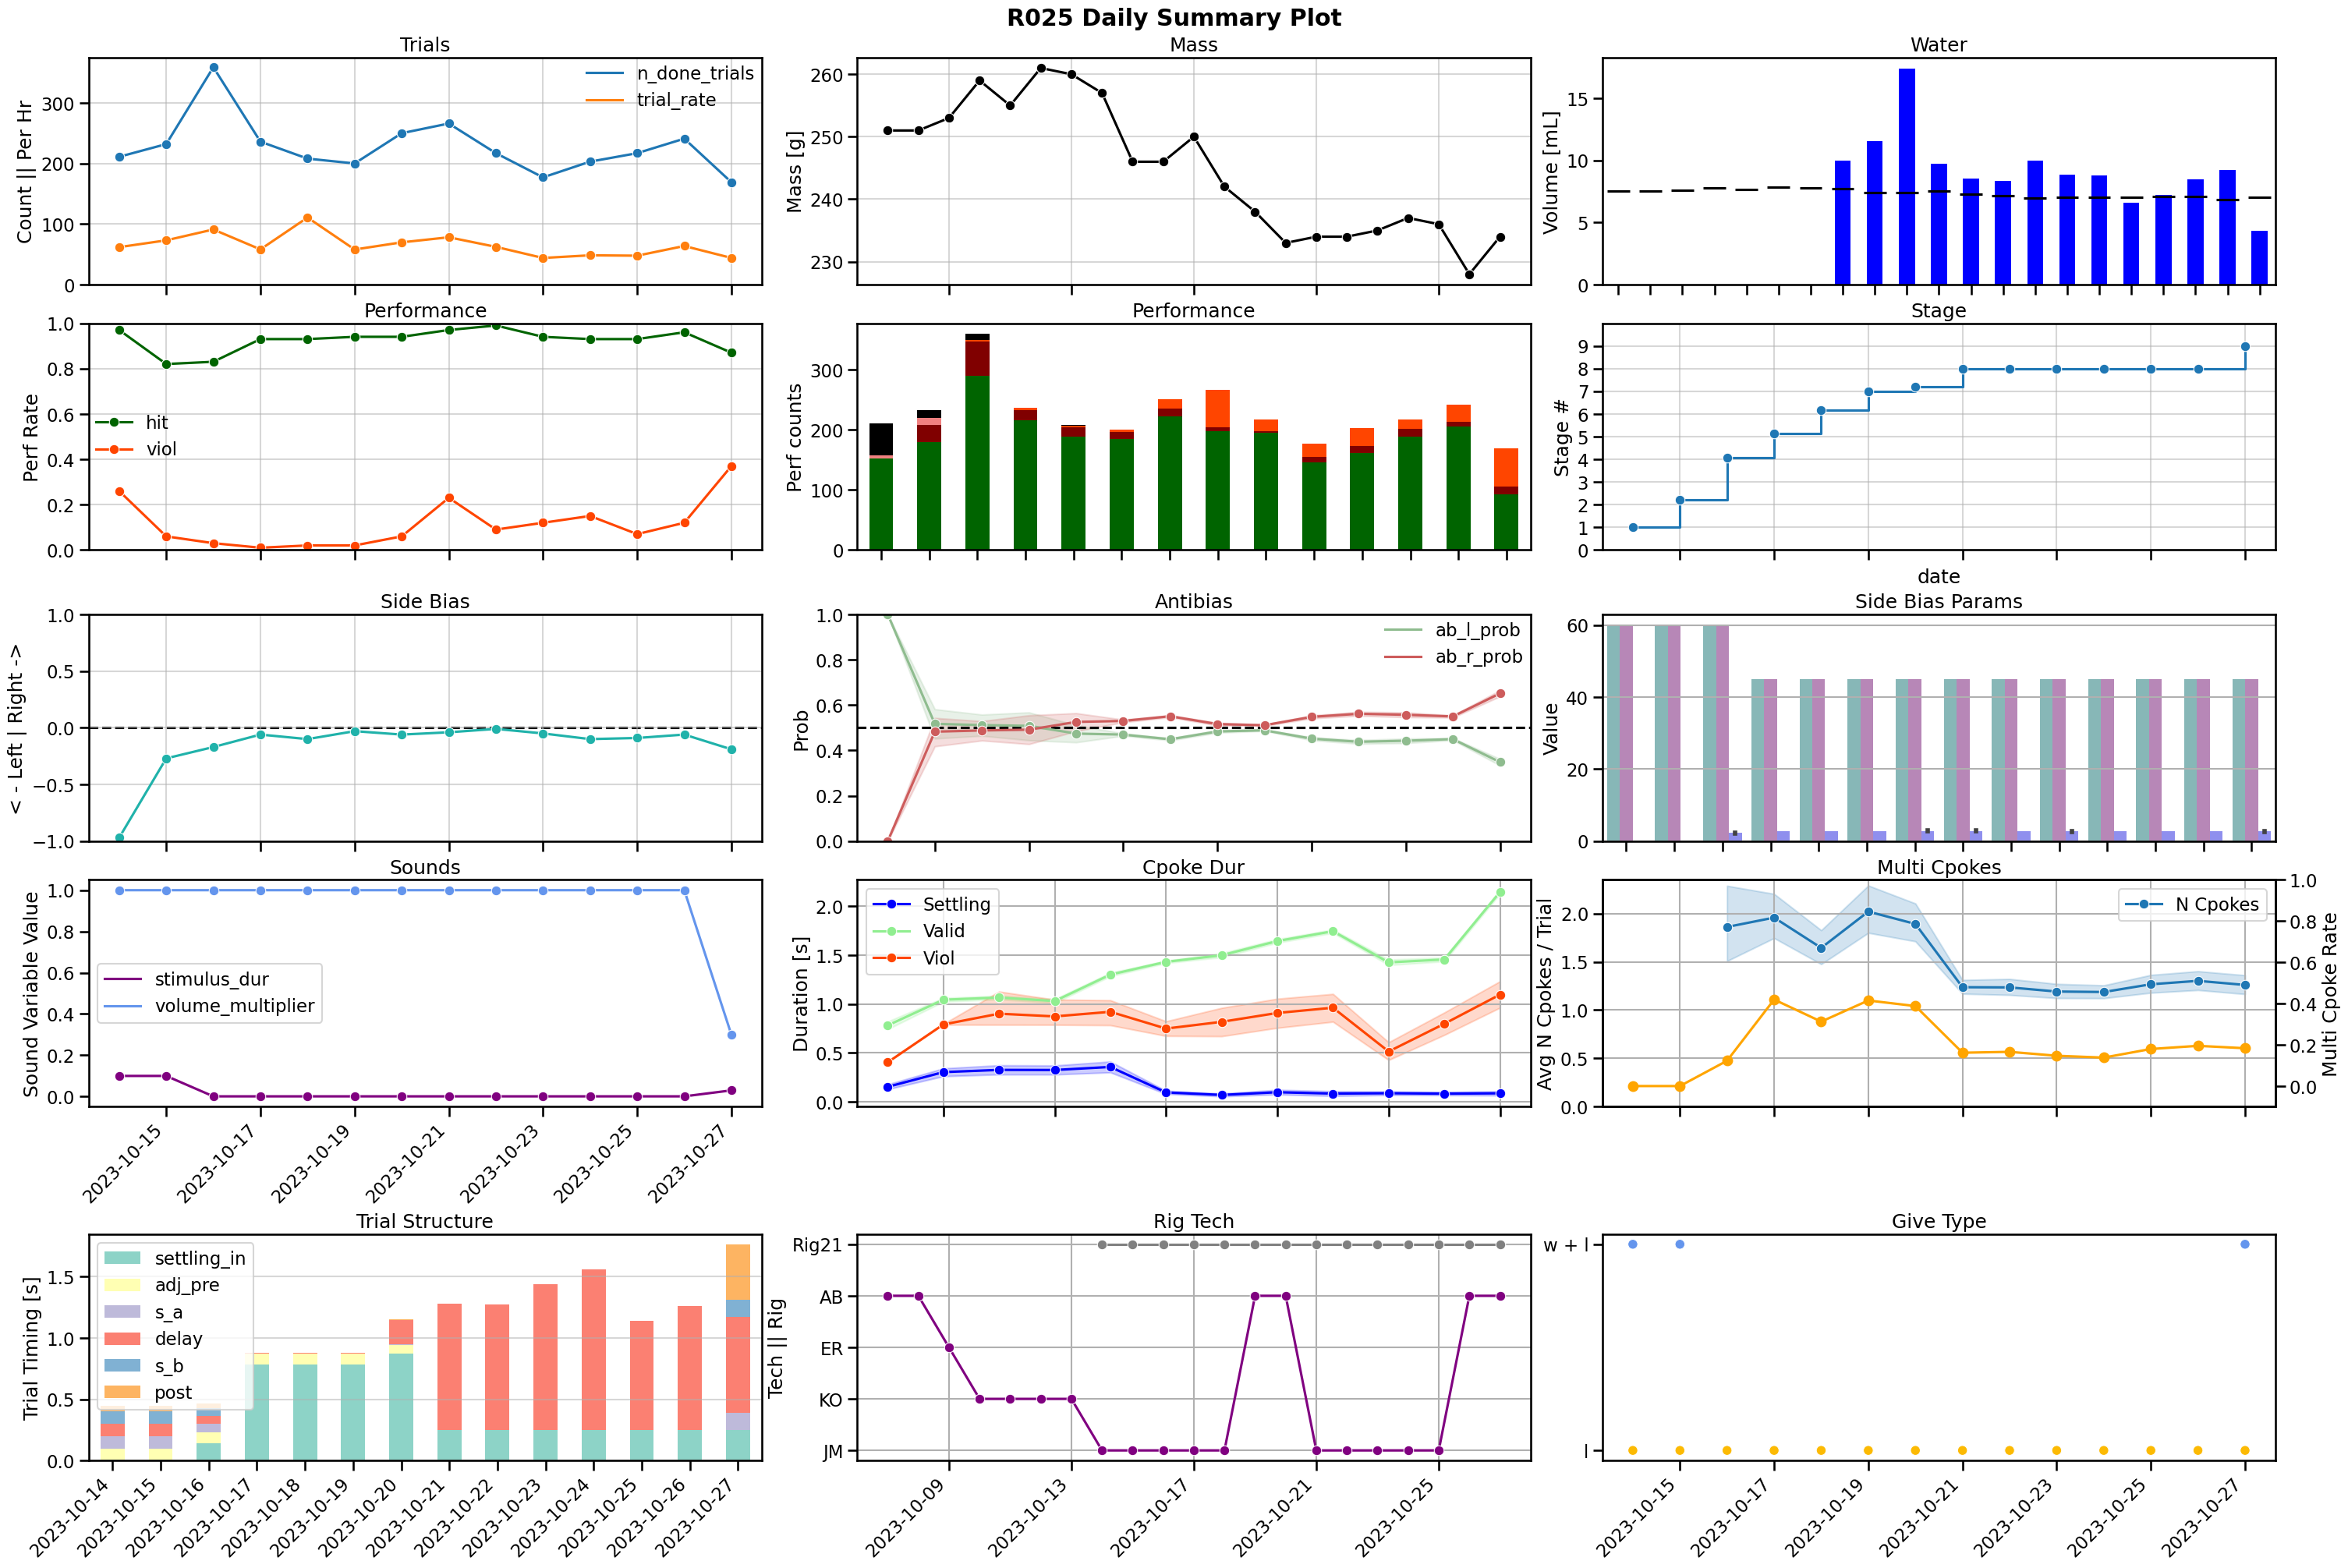

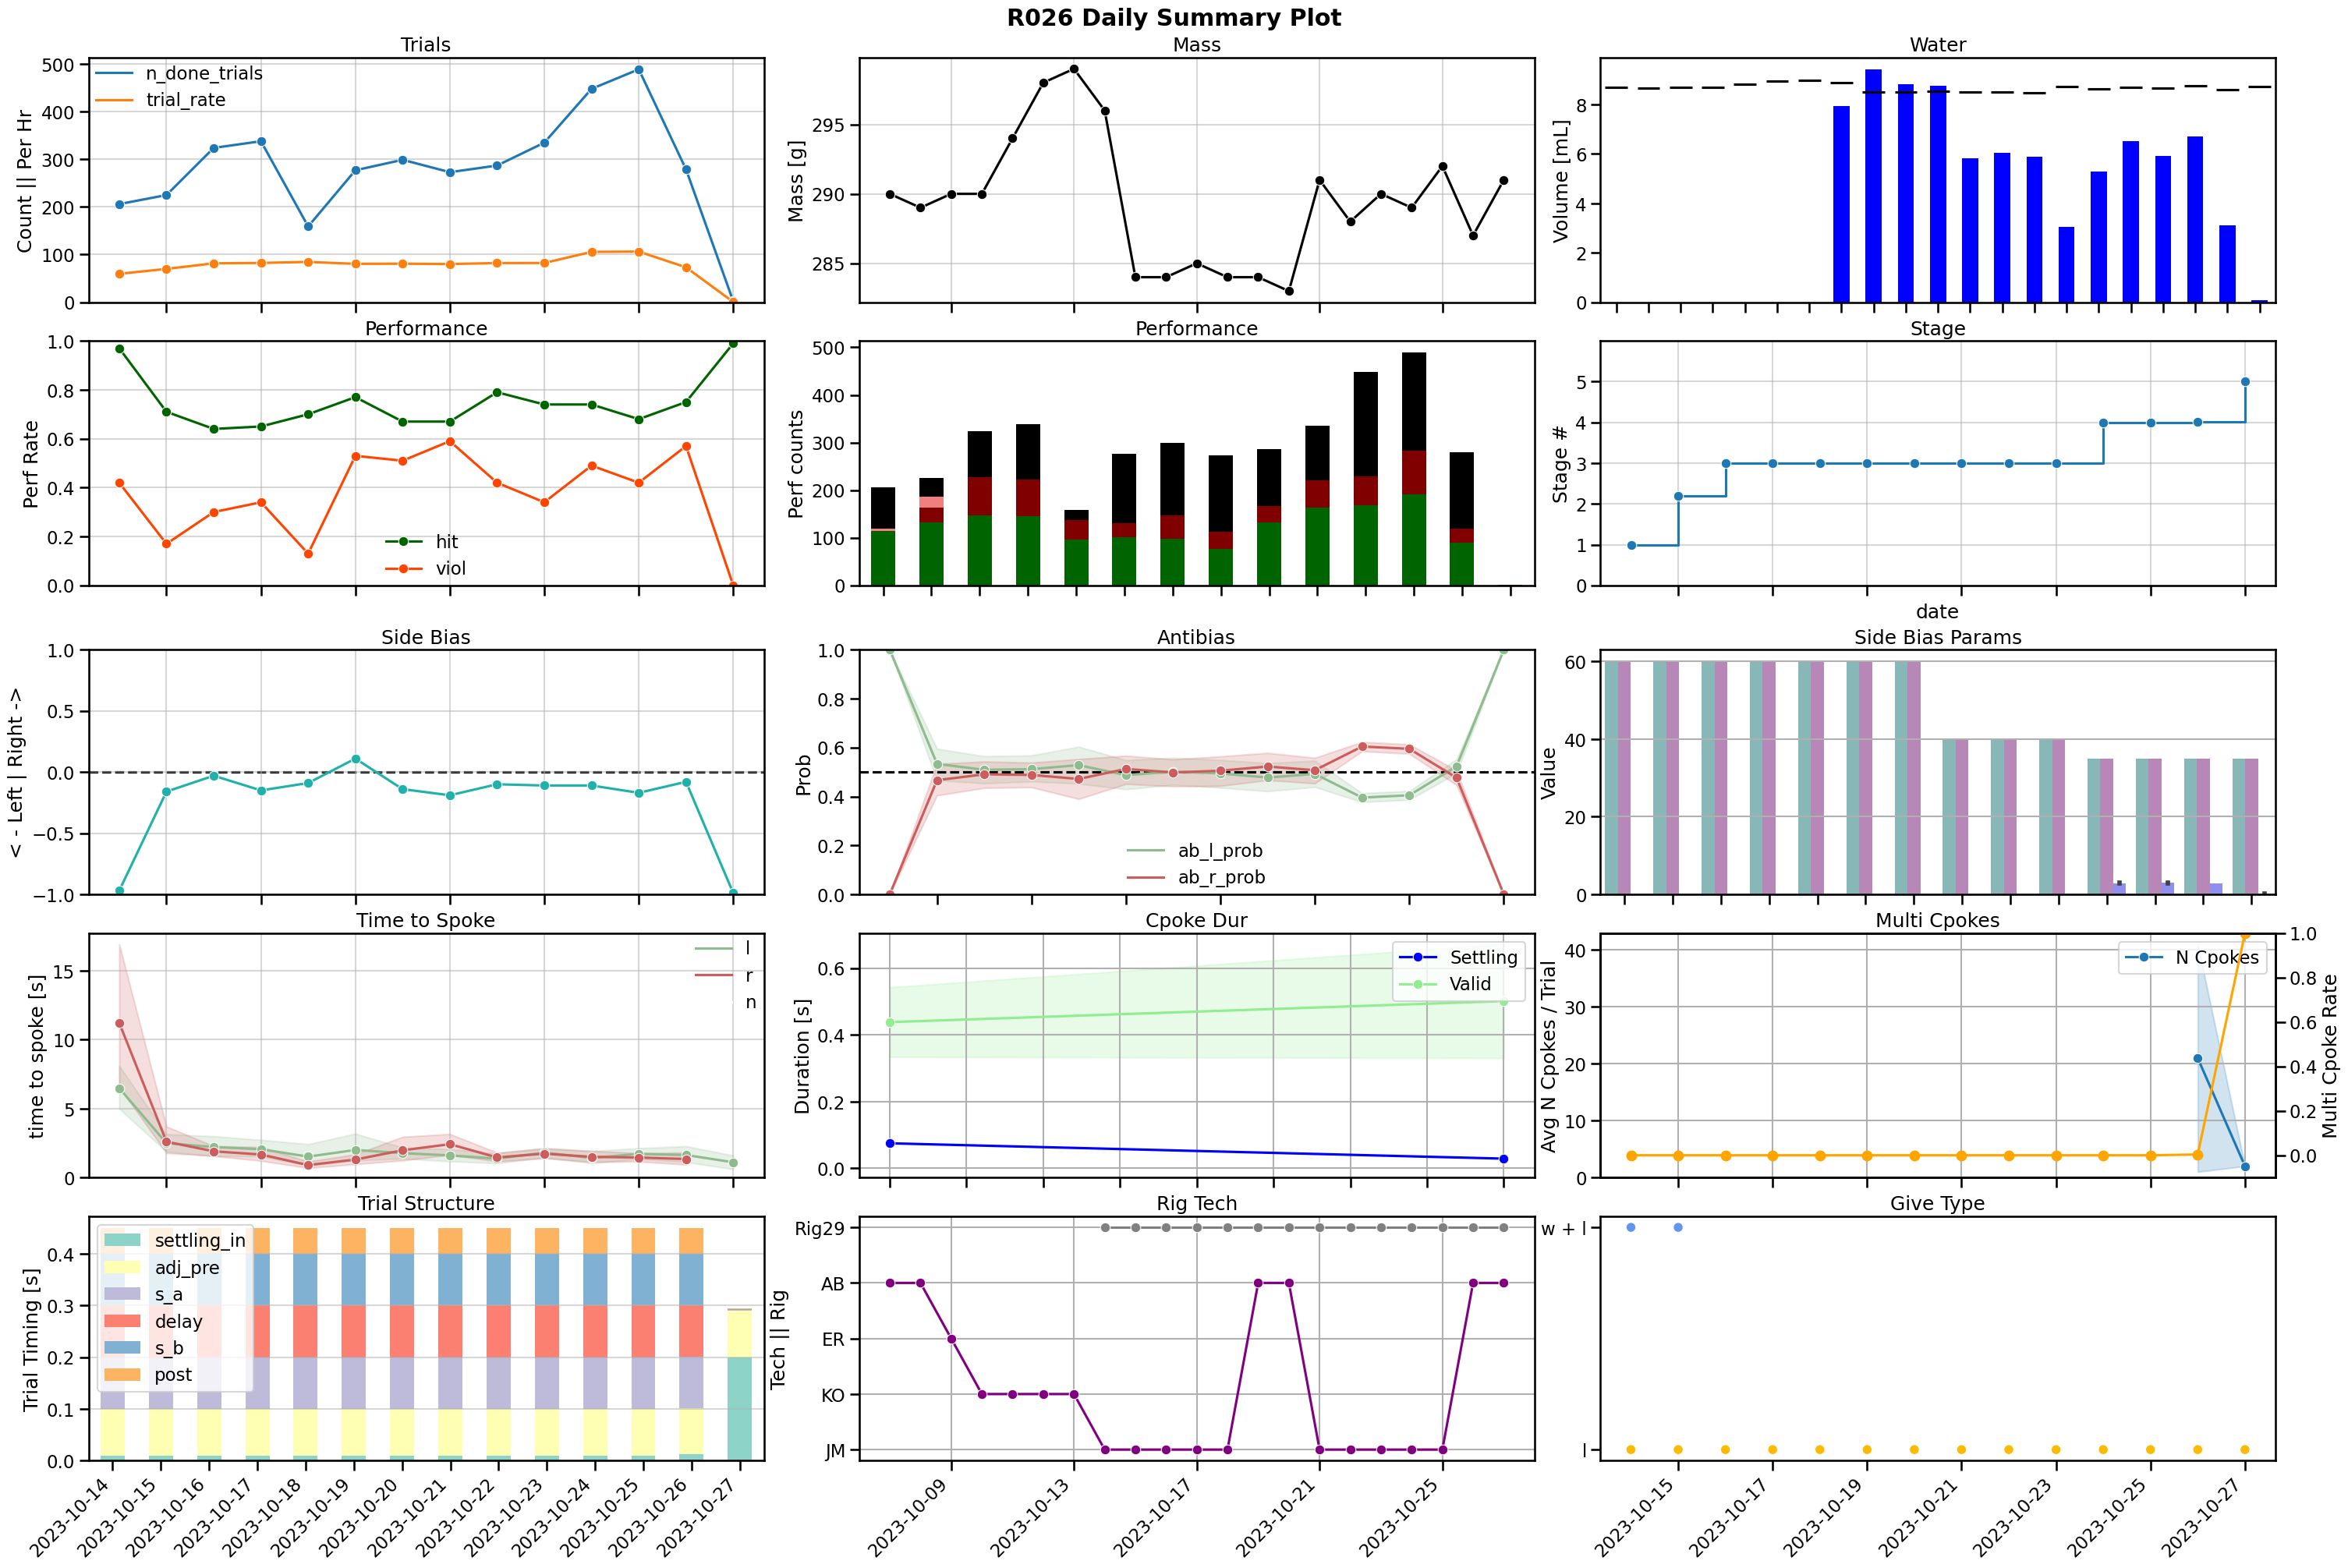

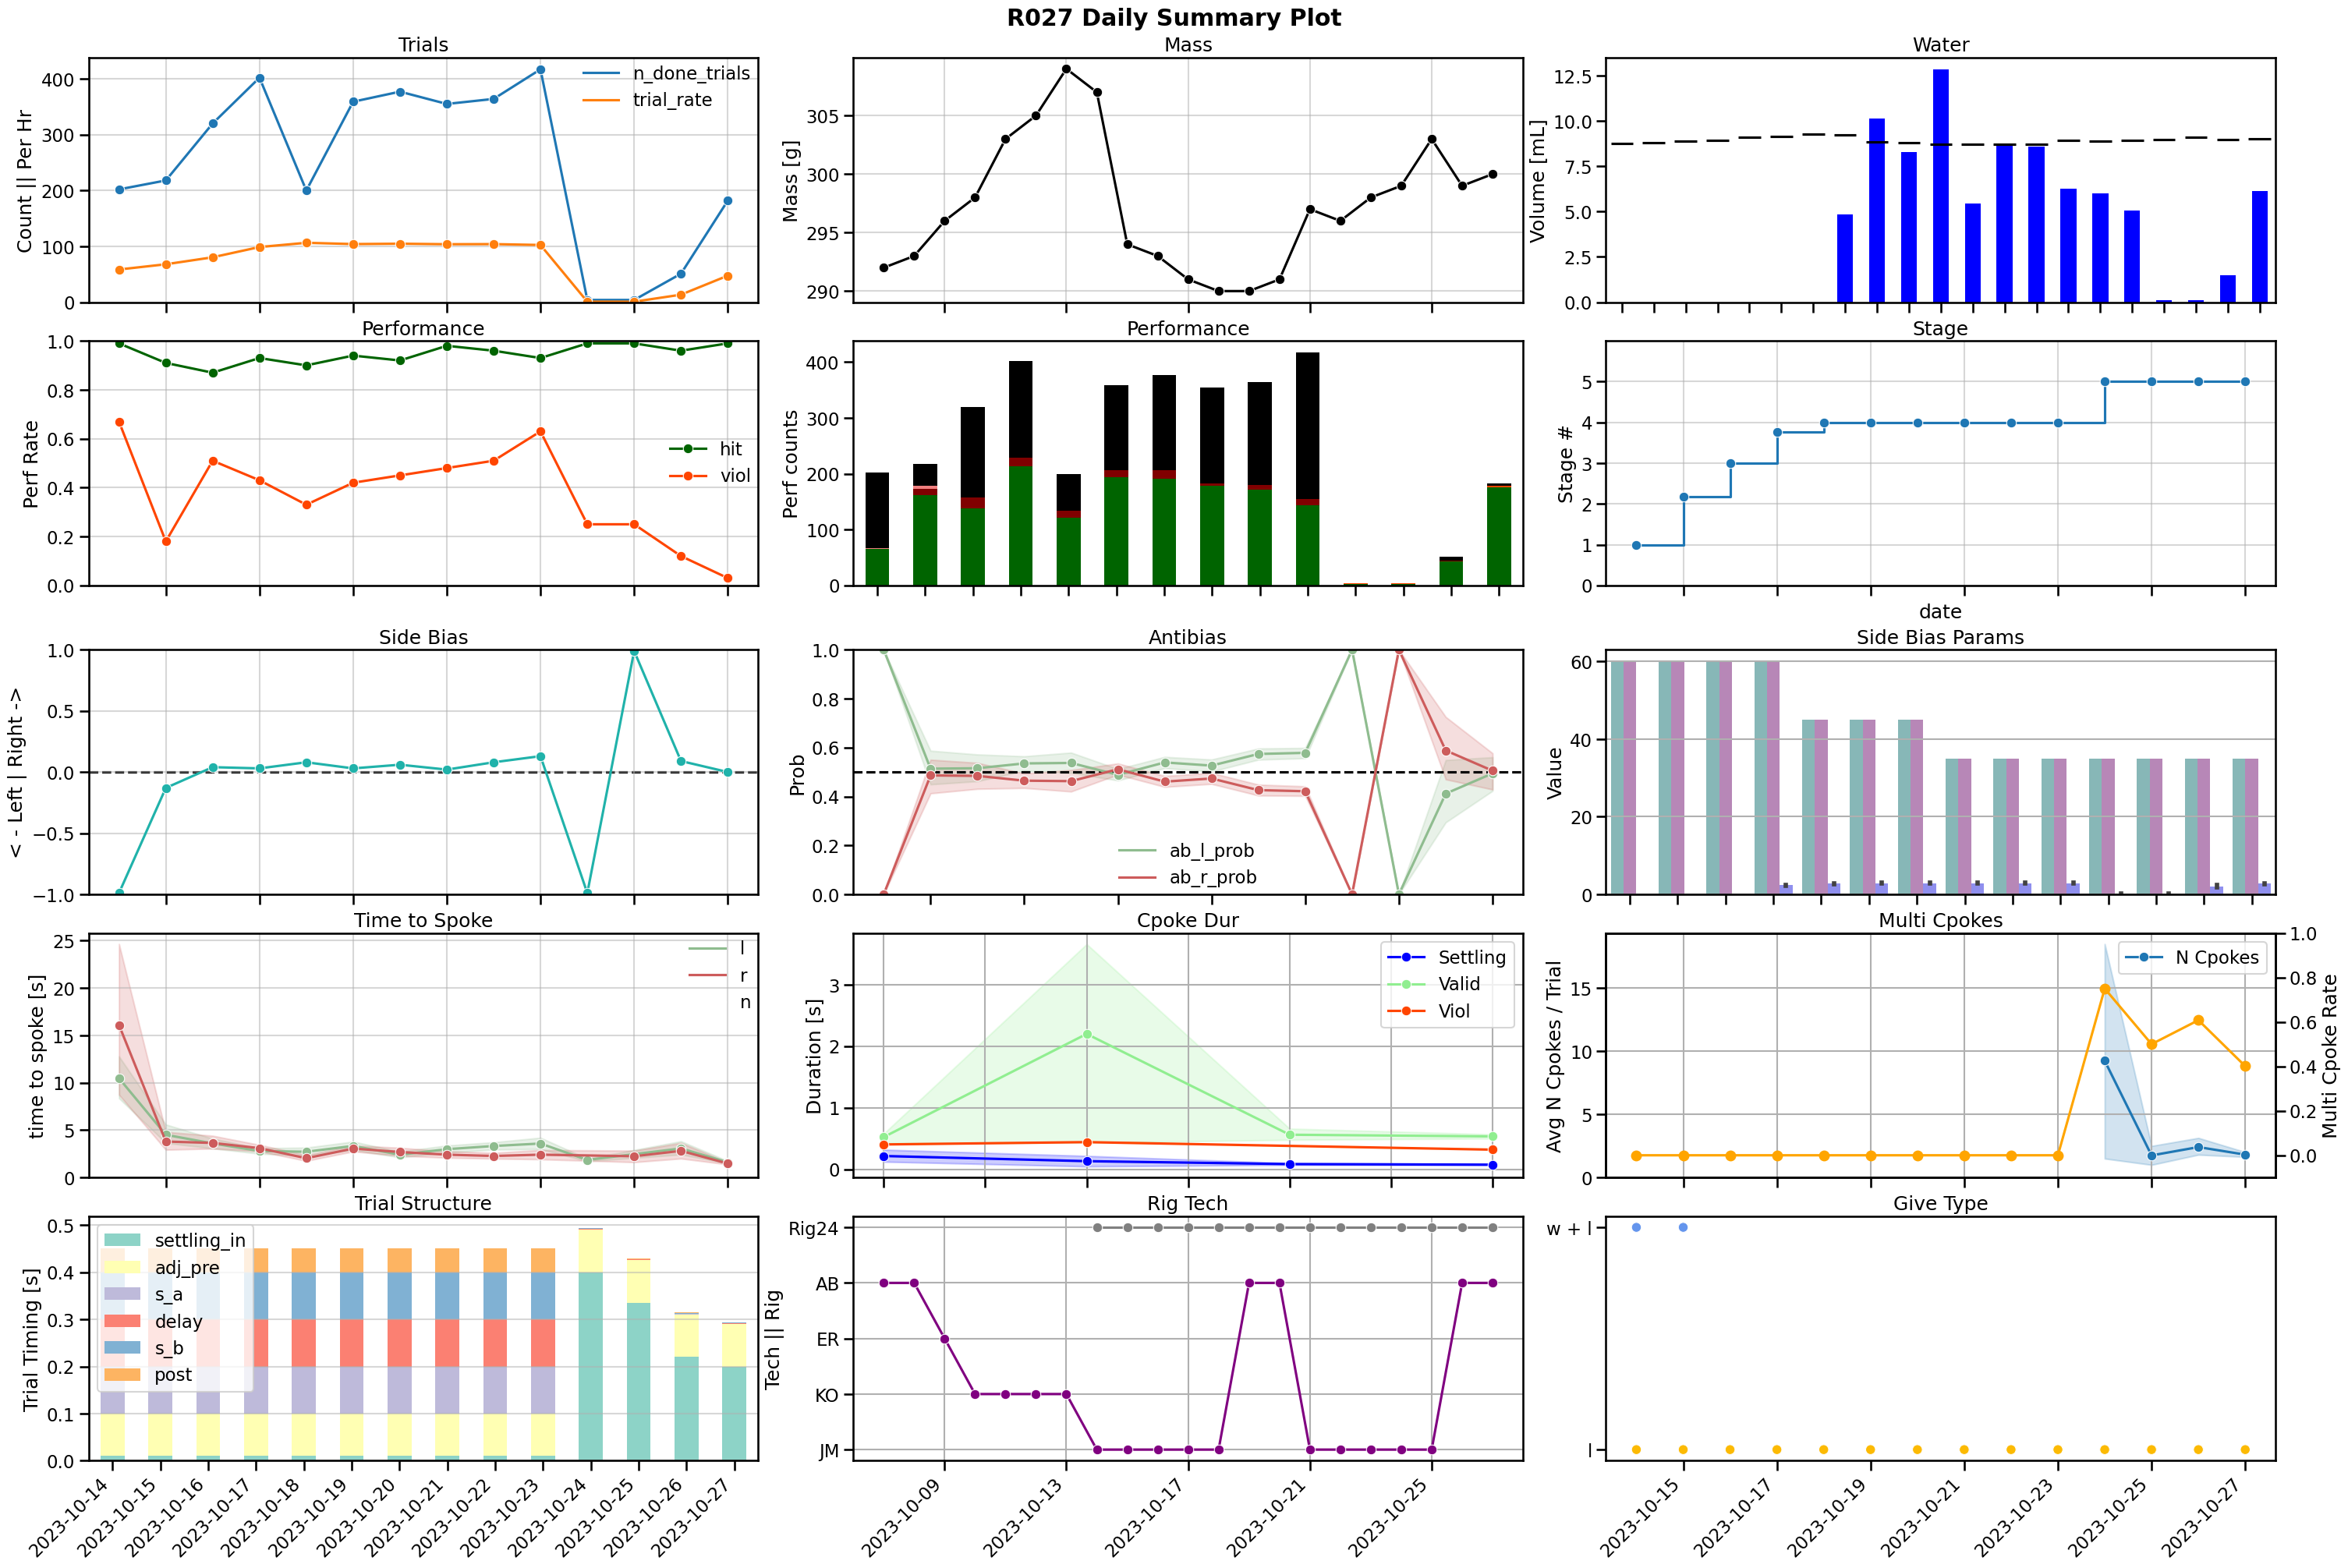

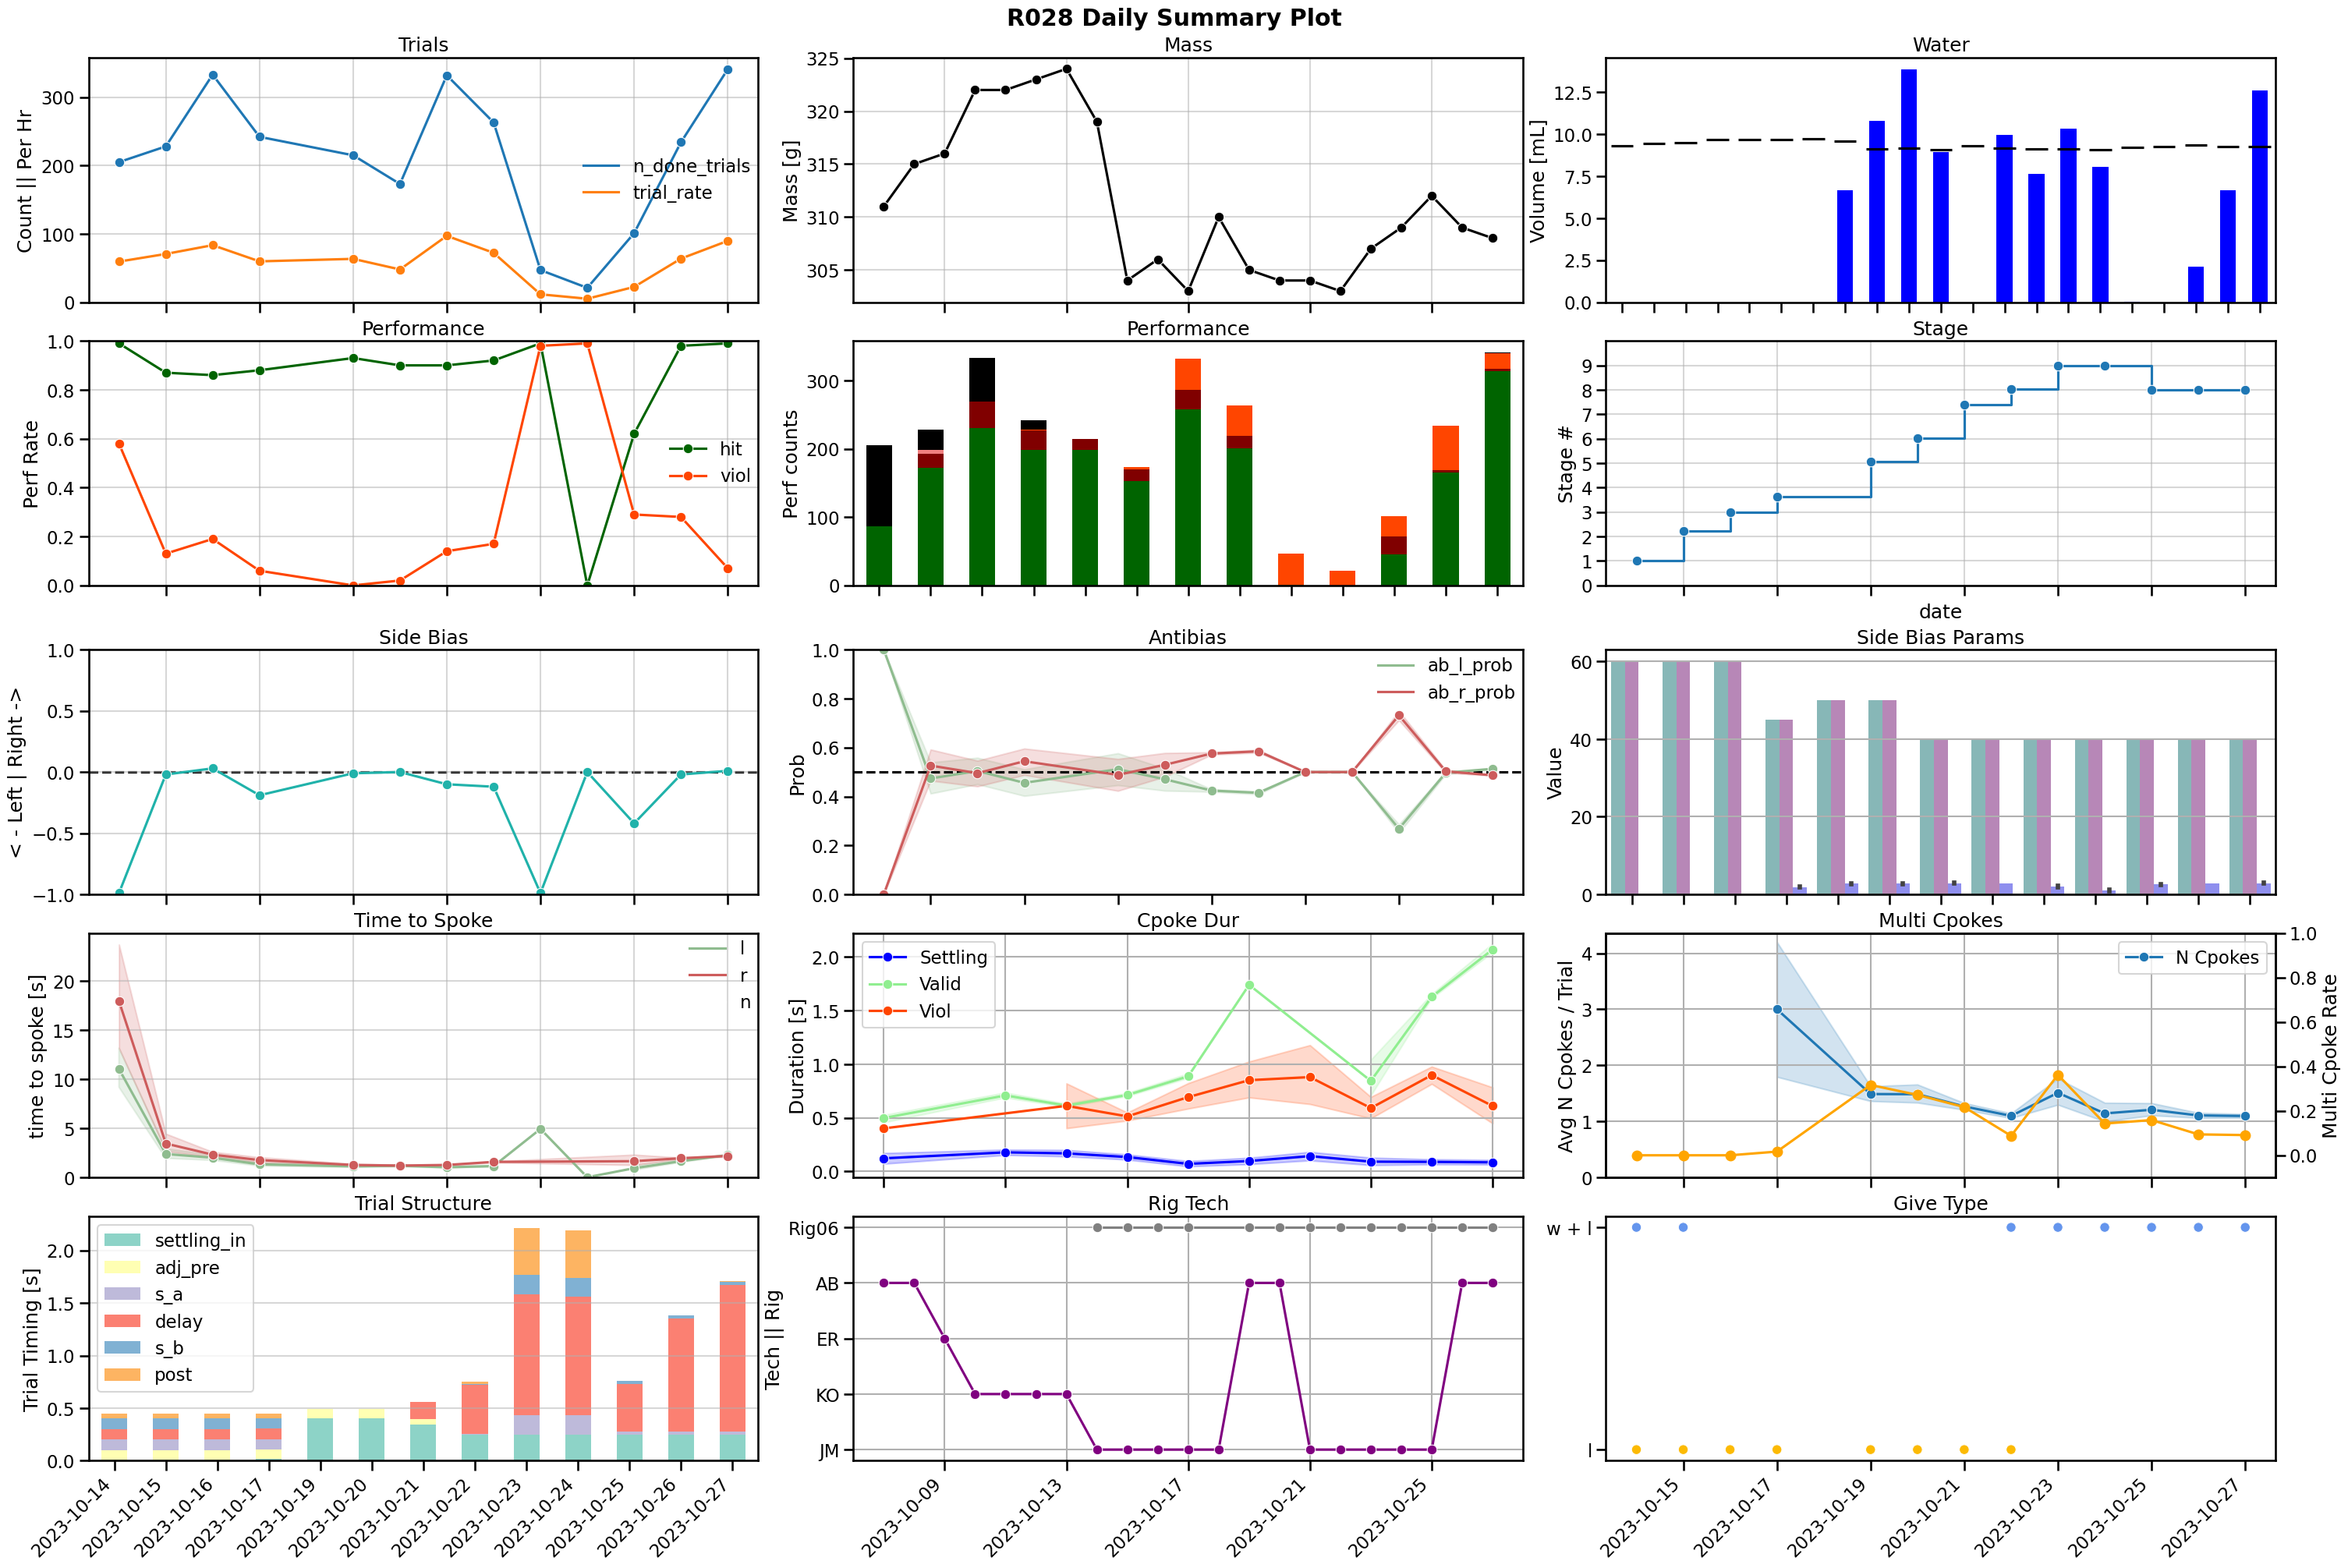

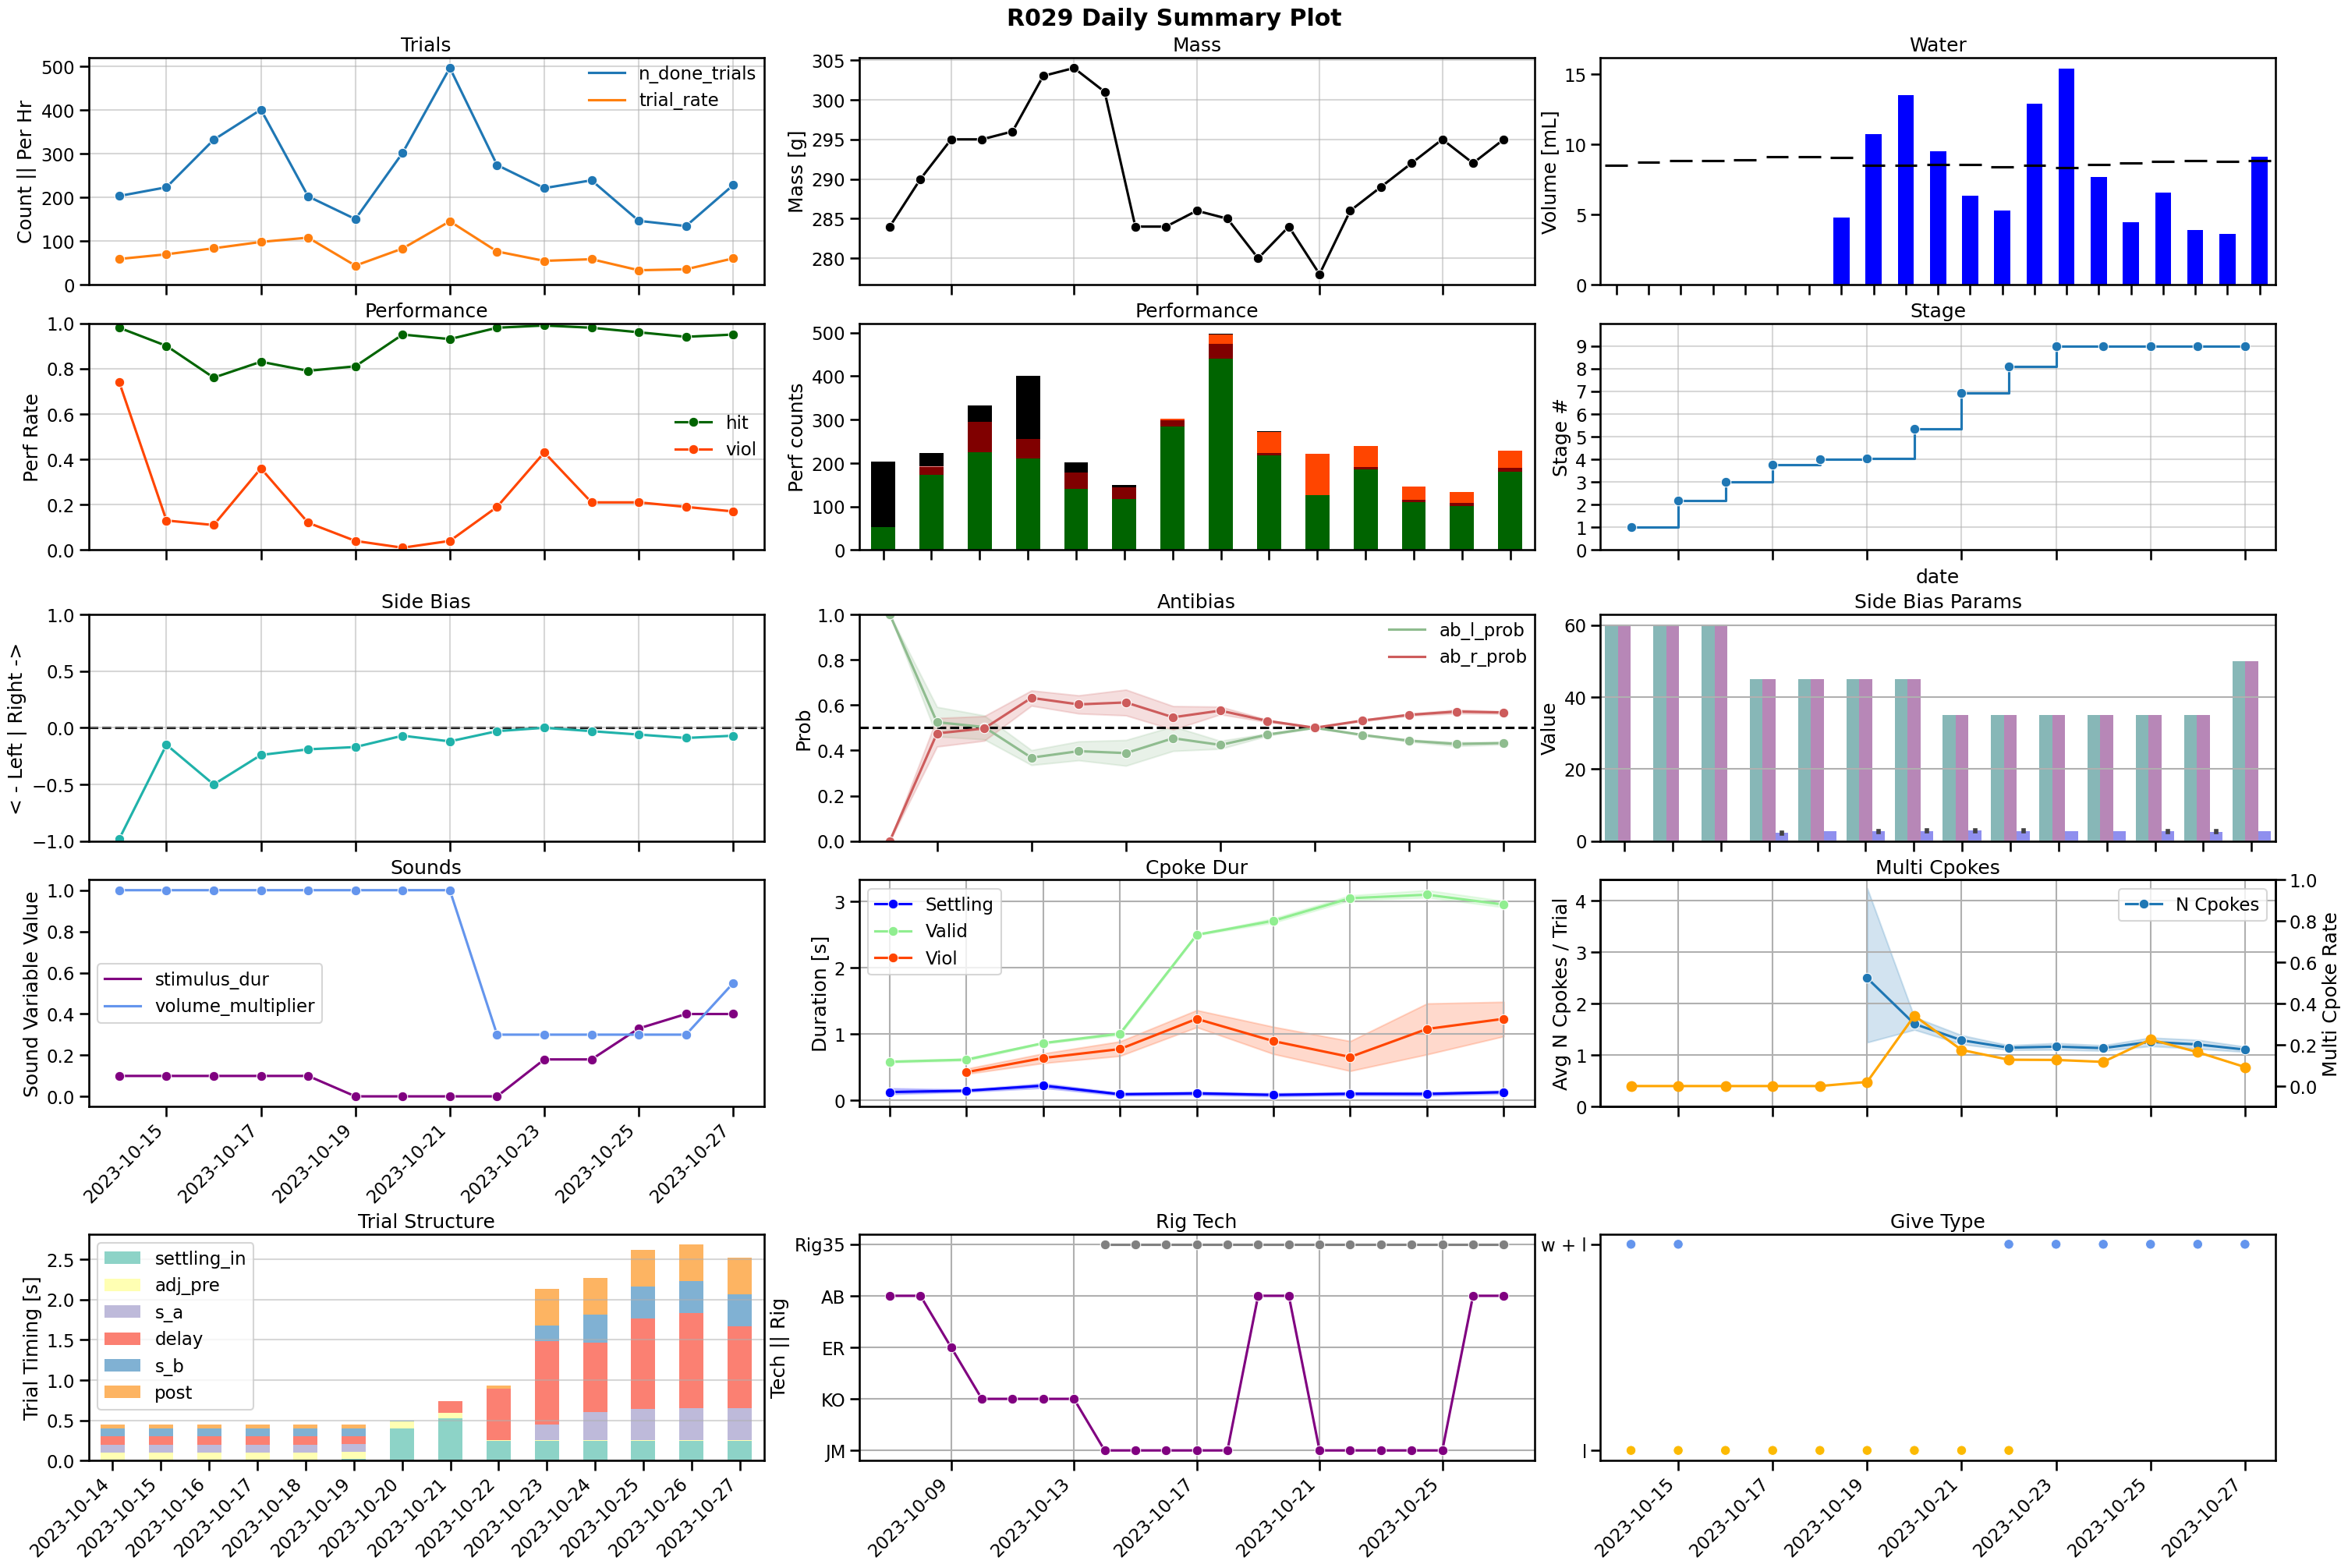

In [20]:
# PLOT DAYS DATA
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    if animal_id == "R030":
        pass
    else:
        multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)

In [21]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R028_2023-10-22_day_summary
making R029_2023-10-22_day_summary
making R024_2023-10-25_day_summary
making R021_2023-10-27_day_summary
making R022_2023-10-27_day_summary
making R023_2023-10-27_day_summary
making R024_2023-10-27_day_summary
making R025_2023-10-27_day_summary
['adj_pre', 's_a', 'delay', 's_b', 'post', 'go']
making R026_2023-10-27_day_summary
making R027_2023-10-27_day_summary
making R028_2023-10-27_day_summary
making R029_2023-10-27_day_summary
['adj_pre', 's_a', 'delay', 's_b', 'post', 'go']
